# **<center>Topología Digital</center>**

## <center>*==Capitulo 1: Conceptos y propiedades básicas de una imagen digital==*</center>

### *Definición 1.1: Imagen Digital*

Una imagen digital es una función $ f: A \subset \mathbb{N}^n \rightarrow \mathbb{Z} $ con $ n = 1, 3 $ o $ 4 $, que asigna a cada elemento o píxel $(i, j) \in A$ un único elemento $f(i, j) \in \mathbb{Z}$ que representa el color asociado a dicho píxel.

### *Definición 1.2: Matriz imagen de una imagen digital*

Una imagen digital de $m \times n$ píxeles es almacenada en la computadora mediante una matriz $A_{m \times n}$. En este caso, el coeficiente $A_{ij}$ representa el color asociado al píxel ubicado en la fila $i$ y columna $j$ para $1 < i < m$, $1 < j < n$. Según el modo con que se confeccione la imagen, dicho coeficiente puede ser un número, una terna o una cuaterna ordenada de enteros comprendidos entre 0 y 255.

La matriz $A$ recibe el nombre de matriz imagen o matriz asociada a la imagen digital.



ValueError: Could not save to JPEG for display

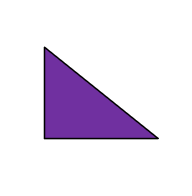

/tmp/ipykernel_5113/1623408276.py:71: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(estilo_color_html)


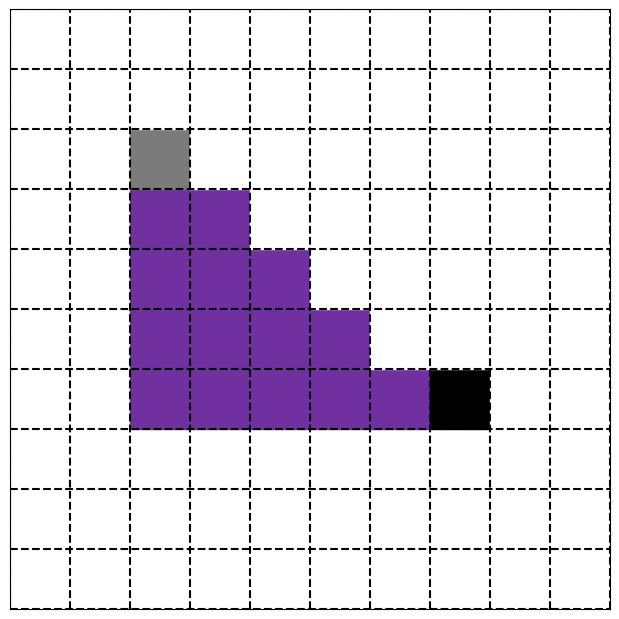

ValueError: Could not save to JPEG for display

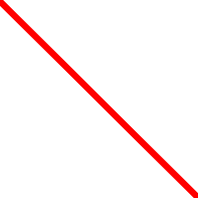

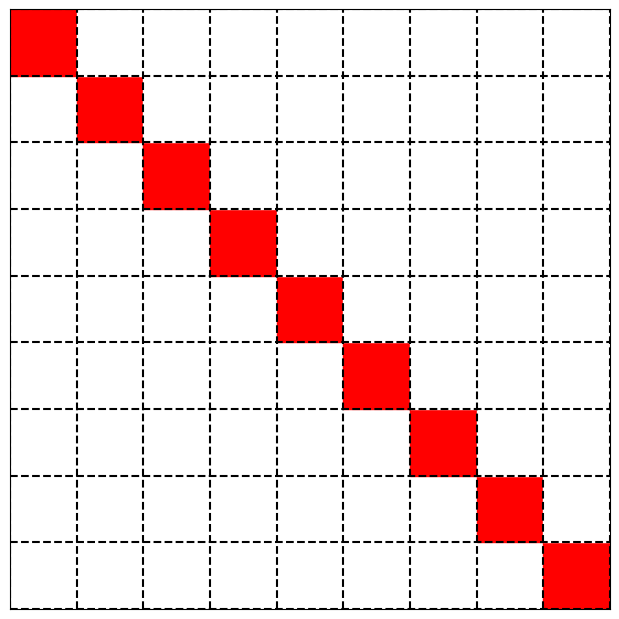

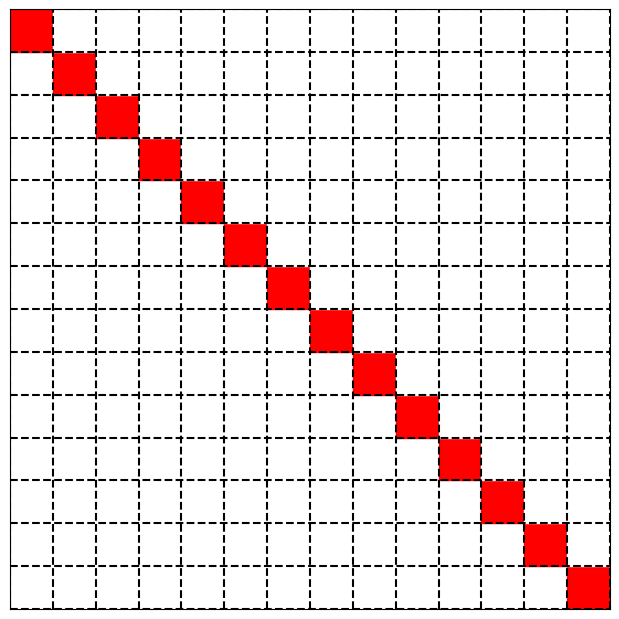

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

def mostrar_matriz_img(matriz):
    matriz = np.rot90(np.transpose(matriz), k=1) 

    n, m = matriz.shape  # Obtener las dimensiones de la matriz

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño de la figura según tus preferencias

    # Dibuja las líneas horizontales
    for i in range(n + 1):
        ax.axhline(y=i, color='black', linestyle='--')

    # Dibuja las líneas verticales
    for j in range(m + 1):
        ax.axvline(x=j, color='black', linestyle='--')

    # Configura los límites del gráfico para ocupar todo el espacio
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)

    # Oculta los números de los ejes
    ax.set_xticks([])
    ax.set_yticks([])

    # Pintar cada celda del retículo con el color correspondiente de la matriz
    for i in range(n):
        for j in range(m):
            elemento = matriz[i, j]
            if isinstance(elemento, tuple):
                # Matriz de tuplas RGB
                color_normalizado = (elemento[0] / 255, elemento[1] / 255, elemento[2] / 255)  # Normaliza el color
                ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color_normalizado))
            elif isinstance(elemento, int):
                # Matriz de valores enteros (B/N o grises)
                color = (elemento / 255, elemento / 255, elemento / 255)  # Normaliza el color
                ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))

    # Mostrar el gráfico
    plt.grid(False)
    plt.gca().set_aspect('equal', adjustable='box')  # Para que los cuadrados sean de igual tamaño
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Ajusta los márgenes a cero
    plt.show()

def matriz_a_img_DF(matriz):
    # Convierte la matriz en un DataFrame
    df = pd.DataFrame(matriz)

    def estilo_color_html(valor):
            valor_int = int(valor) if isinstance(valor, (np.int64, int)) else valor
            if isinstance(valor_int, tuple) and len(valor_int) == 3:
                # Convierte la tupla RGB en una cadena de formato CSS
                color = f'rgb{valor_int}'
                return f'background-color: {color}; width: 30px; height: 30px; text-align: center;'
            elif isinstance(valor_int, int):
                # Convierte el valor (RGB, blanco y negro o grises) en una cadena de formato CSS
                color = f'rgb({valor_int}, {valor_int}, {valor_int})'
                return f'background-color: {color}; width: 30px; height: 30px; text-align: center;'
            else:
                return ''

    # Aplicar el estilo al DataFrame
    styled_df = df.style.applymap(estilo_color_html)

    # Obtener el HTML con los estilos aplicados
    styled_html = styled_df.to_html(escape=False, index=False)

    # Mostrar el HTML en el cuaderno
    display(HTML(styled_html))

#obtener la matriz de una imagen
def matrizImagenDigital(imagen, resolucion, tipo='RGB'):
    # Obtener las dimensiones de la imagen "Real"
    anchoImg, altoImg = imagen.size
    #Obtener la resolucion en pixeles
    ancho_reso, alto_reso = resolucion

    newAnchoPx = anchoImg / ancho_reso
    newAltoPx = altoImg / alto_reso

    # Crear una matriz para almacenar los valores de píxeles en el centro de cada cuadrado
    matriz = np.zeros((ancho_reso, alto_reso), dtype="object")
    
    for x in range(0, ancho_reso):
        for y in range(0, alto_reso):
            coorx = int(anchoImg / (2 * ancho_reso) + x * newAnchoPx)
            coory = int(altoImg / (2 * alto_reso) + y * newAltoPx)
            pixelIMG = imagen.getpixel((coorx, coory))[:3]

            if tipo == 'Gray':
                # Calcular el valor de escala de grises promedio (media de los canales RGB)
                valor_pixel = int((pixelIMG[0] + pixelIMG[1] + pixelIMG[2]) / 3)
            elif tipo == 'B/N':
                # Convertir a blanco y negro (negro si el valor es menor o igual a 128, blanco si es mayor)
                valor_pixel = 0 if sum(pixelIMG) <= 384 else 255
            elif tipo == 'RGB':
                # Mantener el color original (RGB)
                valor_pixel = pixelIMG
            else:
                raise ValueError("Tipo no válido. Use 'Gray', 'B/N' o 'RGB'.")

            #matriz[resolucion - x -1, resolucion - y - 1] = valor_pixel
            matriz[x, y] = valor_pixel

    return np.transpose(matriz)

if __name__ == "__main__":
    # Ruta de la imagen PNG que deseas procesar (debe ser una imagen RGBA)
    imagen_ruta = 'triangle.png'
    #imagen_ruta = 'ship.png'
    #imagen_ruta = 'recta.png'

    # Resolución de pixeles de la cuadrícula (número de divisiones)
    ancho, alto = 10, 10
    resolucion = (ancho, alto)  # Cambia este valor según tus necesidades

    # Abrir la imagen
    imag_triangulo = Image.open(imagen_ruta)

    # Check if the image has an alpha channel (transparency)
    if imag_triangulo.mode == 'RGBA':
         # Convert the image to RGB mode
        img = imag_triangulo.convert('RGB')


    #imprimir imagen
    display(imag_triangulo)

    #figura 1.1 del articulo
    
    # Obtener la matriz de imagen digital
    # Se puede cambiar el tipo si se quiere blanco y negro ("B/N")
    # si quieres grises ("Gray")
    # si quieres RGB es por defecto "RGB"
    matriz = matrizImagenDigital(imag_triangulo, resolucion, 'RGB')
    matriz_a_img_DF(matriz)
    mostrar_matriz_img(matriz)


    #fig 1.2 del articulo
    for ii in [0,9,14]:
        img = Image.open('recta.png')
        reso = (ii,ii)
        if ii == 0:
            display(img)
        else:
            mostrar_matriz_img(matrizImagenDigital(img, reso))
            

    

In [ ]:
#Ejemplo 1.5: Dada la siguiente imagen de 38 x 38 píxeles en Escala de Grises:
#a) Aplicar el Método de Umbralización para separar el objeto (porción de
#paralelepípedo rectangular) del fondo.
#b) Aplicar al objeto el Método de Umbralización a fin de separar el objeto de sus bordes.

if __name__ == "__main__":
    #llamar a la imagen
    img = Image.open('cubo.png')
    #resolucion de la imagen 
    resolucion = (38, 38)
    #matriz Img
    matriz_img = matrizImagenDigital(img, resolucion, 'Gray')
    matriz_a_img_DF(matriz_img)

/tmp/ipykernel_5113/495947515.py:71: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(estilo_color_html)


## <center>*====Capítulo 2: Nociones de topología Digital====*</center>

### *Definición 2.1: Topología Digital*
La Topología Digital es la disciplina de la Matemática creada para estudiar las
propiedades topológicas de una imagen digital.

### *Definición 2.2: El plano digital*
El conjunto $\mathbb{Z}^2$, también conocido como el plano digital 2D de números enteros, está formado por todos los pares ordenados de números enteros $(m, n)$, donde tanto $m$ como $n$ son enteros. Puedes representarlo en notación de conjunto de la siguiente manera:


$$
\mathbb{Z}^2 = \{(m, n) : m, n \in \mathbb{Z}\}
$$

Esto significa que $\mathbb{Z}^2$ incluye todos los puntos en un plano bidimensional donde las coordenadas $x$ ($m$) y $y$ ($n$) son enteros. Es decir, todos los puntos con coordenadas enteras en un plano cartesiano forman parte de $\mathbb{Z}^2$.

### *Notaciones básicas*

- La distancia euclidiana entre $P = (p_1, p_2)$ y $Q = (q_1, q_2) \in \mathbb{Z}$ es
$$
d(P, Q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}
$$

- Si $P = (p_1, p_2) \in \mathbb{R}$ y $\epsilon > 0$, el disco de centro $P$ y radio $\epsilon$ es
$$
B(P, \epsilon) = \{X = (x, y) \in \mathbb{R} : d(P, X) < \epsilon\}
$$

- Si $A$ es un subconjunto de $\mathbb{R}^{2}$ entonces:

    - $\overline{A}$ = complemento de $A$

    - $\text{Int}(A)$ = interior de $A$

    - $\text{Fr}(A)$ = frontera de $A$



In [ ]:
def distanciaEuclidiana(punto1, punto2):
    x1, y1 = punto1
    x2, y2 = punto2
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

def bola(punto, radio = 1):
    bola = []
    x, y = punto
    for xx in range(x-5, x+5):
        for yy in range(y-5, y+5):
            punto_ = (xx,yy)
            if(distanciaEuclidiana(punto, punto_) < radio):
                bola.append(punto_)
    return bola

def complemento(subset, max=100, min=-100):
    x_range = range(min, max)
    y_range = range(min, max)
    universe = {(x, y) for x in x_range for y in y_range}
    complement = universe - subset
    return complement


if __name__ == "__main__":
    punto1 = (0,7)
    punto2 = (0,8)
    print("distancia del ", punto1, " al ", punto2 , " es ", distanciaEuclidiana(punto1, punto2))
    print("bola de ",punto1, " es ",bola(punto1,2))
    S = {(2,4),(2,3),(3,5),(3,4),(3,3),(3,2),(4,5),(4,4),(4,3),(4,2),(5,4),(5,3)}
    print("conjunto S=", S)
    #print("Complemento de S:",complemento(S))
    

distancia del  (0, 7)  al  (0, 8)  es  1.0
bola de  (0, 7)  es  [(-1, 6), (-1, 7), (-1, 8), (0, 6), (0, 7), (0, 8), (1, 6), (1, 7), (1, 8)]
conjunto S= {(4, 4), (2, 4), (3, 4), (4, 3), (5, 4), (4, 2), (2, 3), (4, 5), (3, 3), (5, 3), (3, 2), (3, 5)}




### *Definición 2.3: Vecinos 4N y 8N de un punto*
Dado un punto $P = (x, y) \in \mathbb{Z}$, entonces:

a) Los vecinos 4N de P son $(x, y)$, $(x \pm 1, y)$ y $(x, y \pm 1)$.

b) Los vecinos 8N de P son $(x, y)$, $(x \pm 1, y)$, $(x, y \pm 1)$, $(x+1, y \pm 1)$ y $(x-1, y \pm 1)$.

c) Si $Q \in \mathbb{Z}^{2}$, diremos que **Q es adyacente 4N (u 8N) a P** si P es vecino 4N (u 8N) de Q.



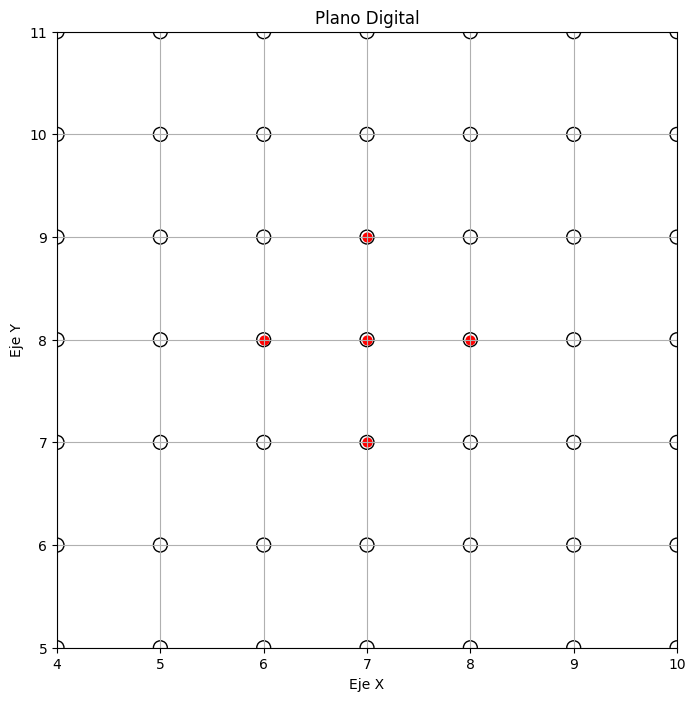

vecinos 4N de  (7, 8)  son  [(7, 8), (8, 8), (6, 8), (7, 9), (7, 7)]


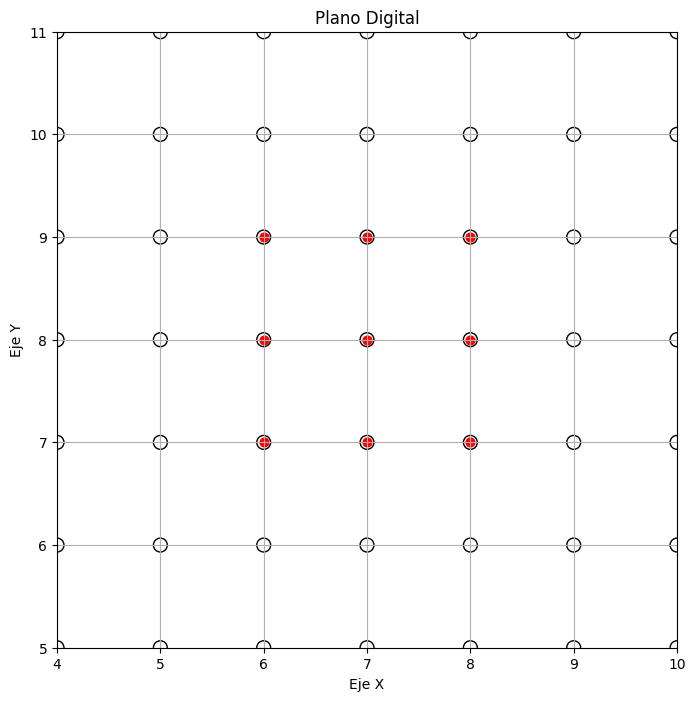

vecinos 8N de  (7, 8)  son  [(7, 8), (8, 8), (6, 8), (7, 9), (7, 7), (8, 9), (8, 7), (6, 9), (6, 7)]


In [ ]:
#Recibe un subconjunto del plano
def graficarPlanoDigital(conjunto):
    # Convierte el conjunto en una lista de coordenadas de puntos enteros
    puntos = list(conjunto)

    # Verifica si el conjunto está vacío
    if not puntos:
        print("El conjunto está vacío.")
        return

    # Separa las coordenadas x y y en listas separadas
    x_values, y_values = zip(*puntos)

    # Calcula los valores mínimos y máximos de x e y en el conjunto
    min_x, max_x = min(x_values), max(x_values)
    min_y, max_y = min(y_values), max(y_values)

    # Ajusta el rango y el tamaño del gráfico en función de los valores mínimos y máximos
    x_range = range(min_x - 2, max_x + 3)
    y_range = range(min_y - 2, max_y + 3)

    # Crea una lista de coordenadas de todos los puntos posibles en el rango
    todos_los_puntos = [(x, y) for x in x_range for y in y_range]

    # Separa las coordenadas x e y de todos los puntos posibles
    x_todos, y_todos = zip(*todos_los_puntos)

    # Crea el gráfico
    plt.figure(figsize=(8, 8))  # Ajusta el tamaño del gráfico
    plt.scatter(x_todos, y_todos, marker='o', facecolor='none', edgecolor='black', s=100)
    plt.scatter(x_values, y_values, marker='o', color='r', s=40)
    plt.grid(True)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Plano Digital')
    plt.xlim(min_x - 2, max_x + 2)  # Ajusta los límites del gráfico
    plt.ylim(min_y - 2, max_y + 2)

    # Muestra el gráfico
    plt.show()


def vecindad(punto, tipo = "4N"):
    x, y = punto
    if(tipo == "4N"):
        return [(x,y), (x+1, y), (x-1,y), (x, y+1),(x, y-1)]
    if(tipo == "8N"):
        return [(x,y), (x+1, y), (x-1,y), (x, y+1), (x, y-1),
                (x+1, y+1), (x+1, y-1), (x-1, y+1), (x-1, y-1)]
    
    
if __name__ == "__main__":
    #un punto arbitrario en plano digital
    punto = (7,8)
    
    #obtener conjunto de vecinos 4N 
    vecinos_punto_4N = vecindad(punto, "4N")
    graficarPlanoDigital(vecinos_punto_4N)
    print("vecinos 4N de ", punto , " son ", vecinos_punto_4N)

    #obtener conjunto de vecinos 8N
    vecinos_punto_8N = vecindad(punto, "8N")
    graficarPlanoDigital(vecinos_punto_8N)
    print("vecinos 8N de ", punto , " son ",vecinos_punto_8N)
    



### *Definición 2.4: Vecindad 4N y 8N de un punto*

Dado un punto $P = (x, y) \in \mathbb{Z}^{2}$ entonces:

a) La vecindad 4N de P es $\{Q \in \mathbb{Z}^{2} : d(P, Q) \leq 1\}$.

b) La vecindad 8N de P es $\{Q \in \mathbb{Z}^{2} : d(P, Q) \leq 2\}$.

**nota:** la definicion anterior esta son parecidas, pero en el anterior definen un vecino  aqui definen la vecindad, pero ya habiamos definido como era una vecindad de un punto. rambien nos podemos dar cuenta que la vecindad 4N esta dentro de la vecindad 8N.

### Definición 2.5: Base para una topología en ℤ²

Sea $P = (x, y) \in \mathbb{Z}^{2}$ y $U(P)$ el conjunto definido por:

$$
U(P) =
\begin{cases}
{P} & \text{si } x + y \text{ es impar} \\
\{Q : Q \text{ es vecino 4N de P}\} & \text{si } x + y \text{ es par}
\end{cases}
$$

El conjunto $B = \{U(P) : P \in \mathbb{Z}^{2}\}$ recibe el nombre de **Base para una topología** en $\mathbb{Z}^2$.

**nota:** Ahora estamos en condiciones de presentar **la Topología de Marcus-Wyse** para $\mathbb{Z}^{2}$. La llamaremos **"la topología digital** de $\mathbb{Z}^{2}$" y se define de la siguiente manera:



In [ ]:
#definicion de u
def U(punto):
    x, y = punto 
    if((x+y)%2 != 0):
        return {punto}
    else:
        return set(vecindad(punto, "4N"))

base_topología_digital = []
# creando basicos
for x in range(-100,100):
    for y in range(-100, 100):
        punto = (x,y)
        base_topología_digital.append(U(punto))

#imprime lo basicos de la base
#print(base_topología_digital)

Supongamos que tenemos un conjunto cualquiera de puntos de la topologia, queremos saber si es abierto:

El conjunto  {(0, 1), (2, 3), (1, 2), (2, 1), (1, 0), (1, 1)}
El conjunto es abierto : True


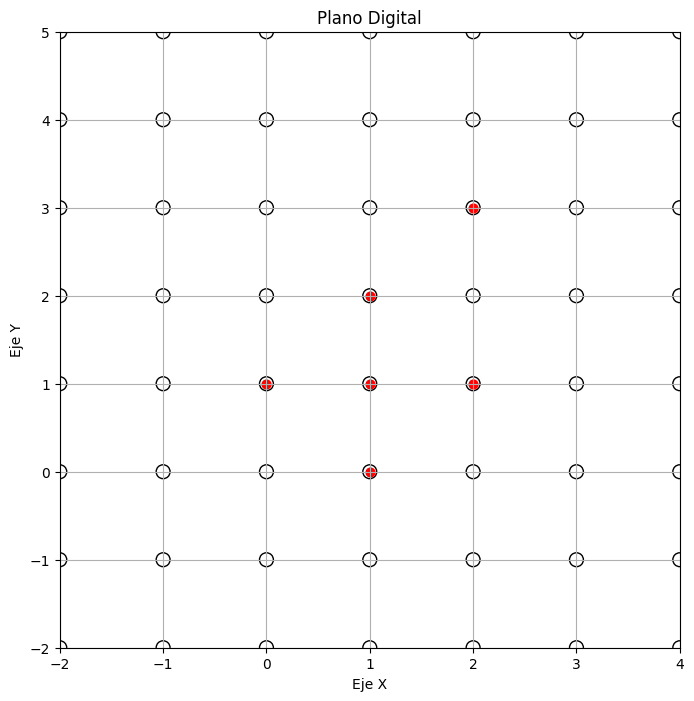

El conjunto  {(0, 1), (2, 3), (1, 0), (1, 2), (2, 1), (3, 1), (1, 1)}
El conjunto es abierto : False


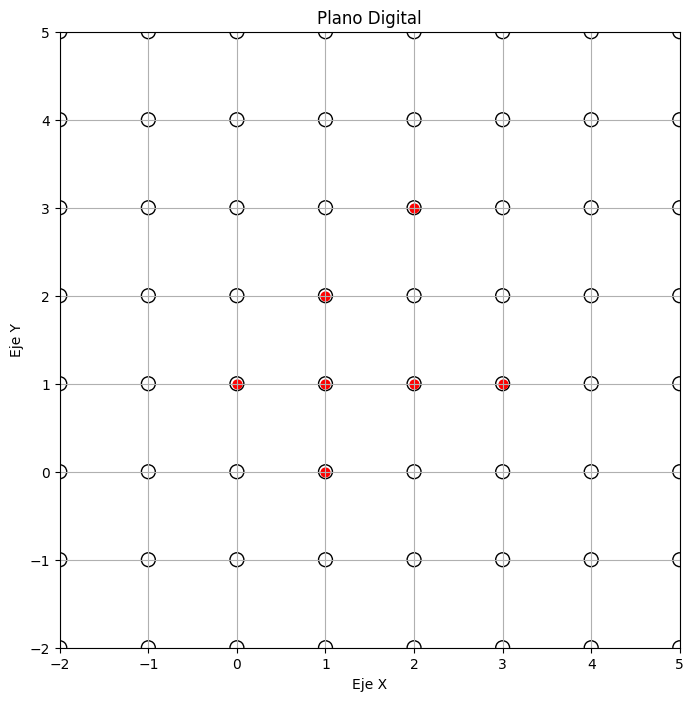

In [ ]:
def interior(conjunto):

    subset = set(conjunto)
    abiertos_subset = []

    for element in subset:
        for basic in base_topología_digital:
            if element in basic:
                if basic <= subset:
                    abiertos_subset.append(basic)

    unionTotal = set()
    for basic in abiertos_subset:
        unionTotal = unionTotal | basic

    return unionTotal

#frontera como se definio en el articulo
def frontera(S):
    conjunto_S = set(S)
    frontera_S = set()

    for punto in conjunto_S:
        vecinos = vecindad(punto, "4N")  # Utiliza vecindad 4N
        if not all(vecino in conjunto_S for vecino in vecinos):
            frontera_S.add(punto)

    return frontera_S
    
def es_abierto(set):
    if set == interior(set):
        return True
    else:
        return False

if __name__=="__main__":

    #Ejemplos del articulo
    #Ejemplo 2.1: Es S es abierto en la topología digital?
    S = { (0,1), (1,0), (1,1) , (1, 2) , (2,1) , (2,3) }
    print("El conjunto ", S)
    print("El conjunto es abierto :", es_abierto(S))
    es_abierto(S)
    graficarPlanoDigital(S)


    #Ejemplo 2.2: Es S es abierto en la topología digital?
    S = { (0,1), (1,0), (1,1) , (1, 2) , (2,1) , (2,3),(3,1) } 
    print("El conjunto ", S)
    print("El conjunto es abierto :", es_abierto(S))
    es_abierto(S)
    graficarPlanoDigital(S) 


**Definición de Frontera en Topología Digital**

La definición de frontera en la topología digital difiere de lo que intuitivamente esperamos en la topología estándar en $ \mathbb{R}^2 $, donde la "frontera de un conjunto" se refiere al "borde" del conjunto. En la topología digital, la frontera de un conjunto $ S $ se define de manera específica de la siguiente manera:

La frontera de un conjunto $ S $ en la topología digital es el conjunto de puntos que pertenecen a $ S $ y tienen vecinos 4N (vecinos en las direcciones Norte, Sur, Este y Oeste) que también pertenecen a $ S $.


El conjunto S= {(4, 4), (2, 4), (3, 4), (4, 3), (5, 4), (4, 2), (2, 3), (4, 5), (3, 3), (5, 3), (3, 2), (3, 5)}


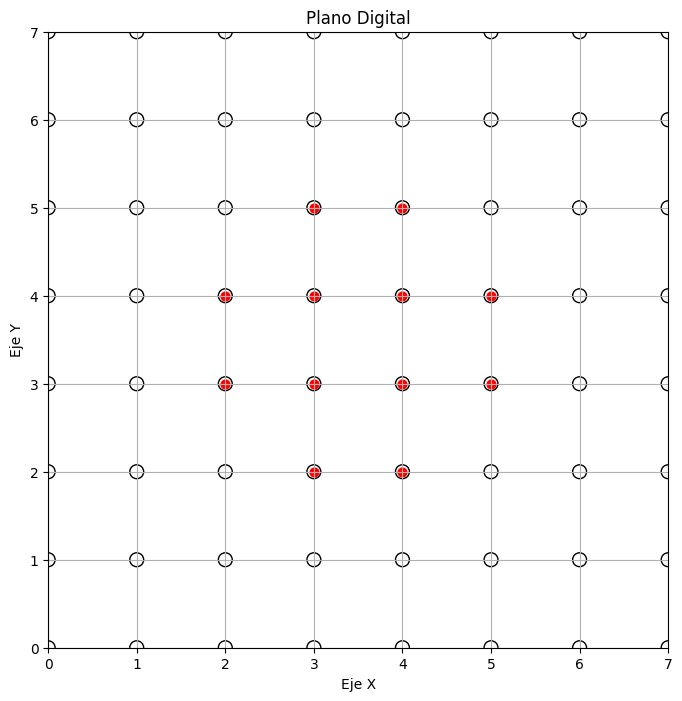

Interior Int(S)= {(4, 4), (3, 4), (4, 3), (5, 4), (2, 3), (4, 5), (3, 3), (3, 2)}


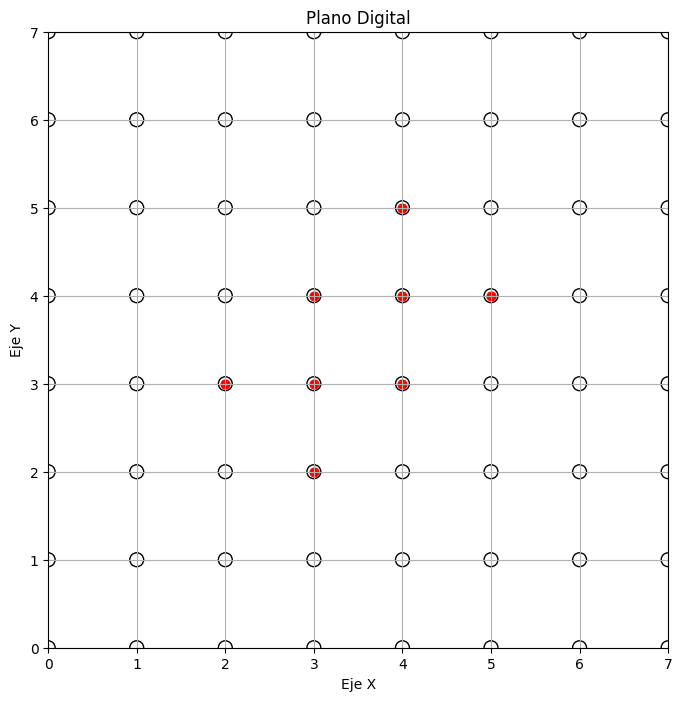

Frontera Fr(S)= {(2, 4), (5, 4), (4, 2), (2, 3), (4, 5), (5, 3), (3, 2), (3, 5)}


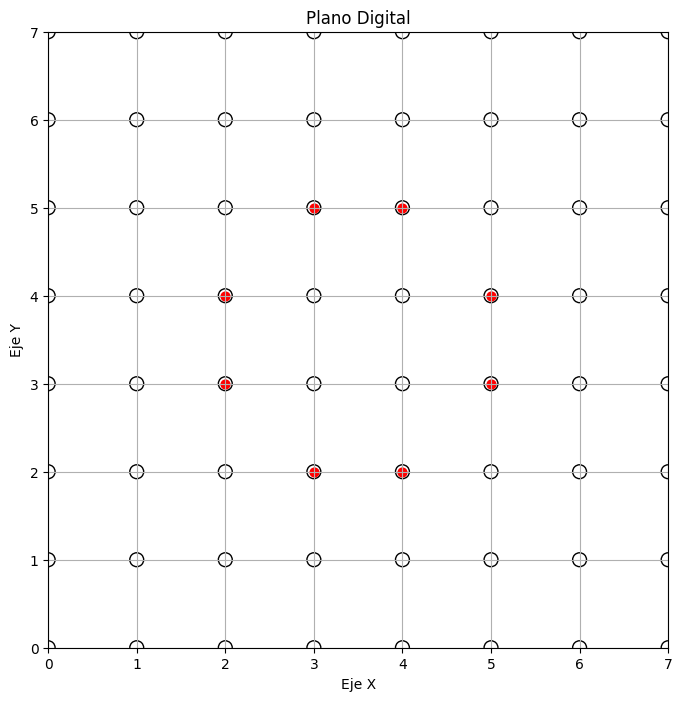

In [ ]:

if __name__=="__main__":
    #Ejemplo 2.3: Es S es abierto en la topología digital, obtener su interior y su frontera?
    S = {(2,4),(2,3),(3,5),(3,4),(3,3),(3,2),(4,5),(4,4),(4,3),(4,2),(5,4),(5,3)}
    print("El conjunto S=", S)
    graficarPlanoDigital(S)
    print("Interior Int(S)=", interior(S))
    graficarPlanoDigital(interior(S))
    print("Frontera Fr(S)=", frontera(S))
    graficarPlanoDigital(frontera(S))
    es_abierto(S)
    #es_abierto(frontera(S))

## <center>*====Capítulo 3: Propiedades topológicas de una imagen digital====*</center>

### *Definición 3.1: Imagen digital  $\Pi$  y su frontera*

Una imagen digital $ \Pi $ de  en $ M \times N $ Píxeles se define como un subconjunto finito de $ \mathbb{Z}^2 $ que satisface las siguientes restricciones:
$$ \Pi = \{(x, y) : 1 \leq x \leq N, 1 \leq y \leq M\} $$

En este contexto, el borde de $ \Pi $, denotado como $ \text{Borde}(\Pi) $, se define como el conjunto de puntos que pertenecen a $ \Pi $ y que están ubicados en los límites de la imagen. Formalmente, el borde se describe como:
$$ \text{Borde}(\Pi) = \{(x, y) \in \Pi : x = 1 \lor x = N \lor y = 1 \lor y = M\} $$

El borde de $ \Pi $ consiste en aquellos píxeles que están en los bordes izquierdo, derecho, superior o inferior de la imagen $ \Pi $ en el plano discreto $ \mathbb{Z}^2 $.


### *Definición 3.2: La Topología $ \tau_{\Pi} $ de $ \Pi $*

La topología $ \tau_{\Pi} $ de $ \Pi $ es la topología generada por la base $ \mathcal{B}_{\Pi} $ definida como:
$$ \mathcal{B}_{\Pi} = \{ U(P) \cap \Pi : P \in \mathbb{Z}^2 \} $$

En consecuencia, los miembros de $ \tau_{\Pi} $ se pueden expresar como uniones de elementos de $ \mathcal{B}_{\Pi} $.


ValueError: Could not save to JPEG for display

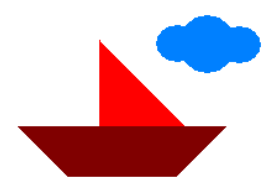

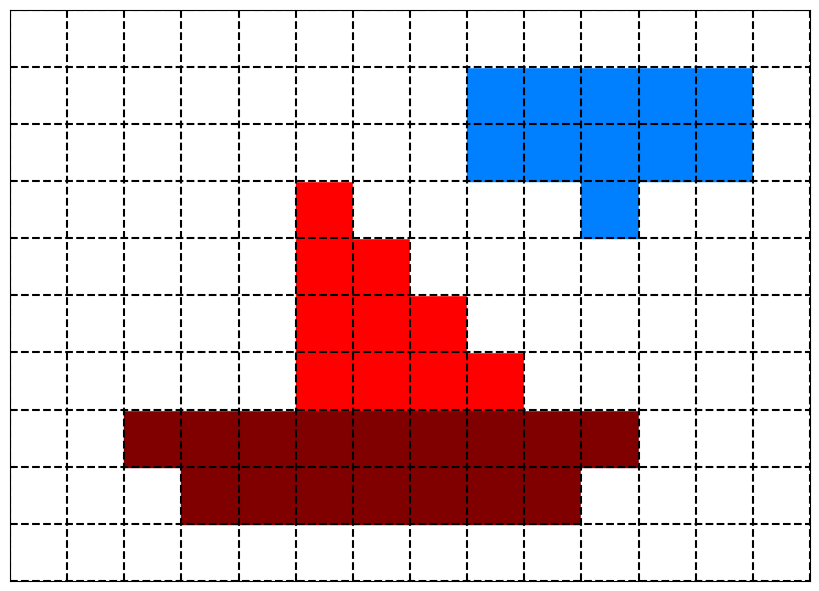

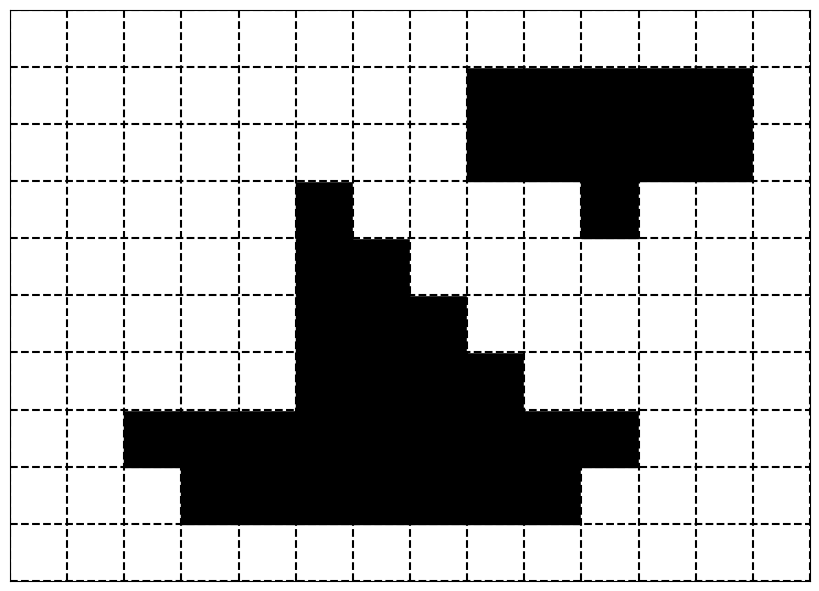

In [ ]:
def conjImgDigital(matriz_img):
    if isinstance(matriz_img, np.ndarray):
        N, M = matriz_img.shape
        return {(x, y) for x in range(0, M) for y in range(0, N)}
    else:
        N, M = matriz_img
        return {(x, y) for x in range(0, M) for y in range(0, N)}
    


def borde(dimension):
    N, M = dimension
    bordeAltos = {(x, y) for x in [0, M] for y in range(0, N)}
    bordeAncho = {(x, y) for x in range(0, M) for y in [0, N]}
    return bordeAltos | bordeAncho
    

def topoHereda(matrizImg):
    pi_ = conjImgDigital(matrizImg)
    base = [list(U(p) & pi_) for p in pi_]
    return base


if __name__=="__main__":
    #Ejemplo 3.1: 
    #abriendo image
    dir_img = 'ship.png'
    imagen = Image.open('ship.png')
    ancho = 14
    alto = 10
    resolucion = (ancho, alto)

    #matriz de la imagen
    matriz_img_RGB = matrizImagenDigital(imagen, resolucion)
    matriz_img_BN = matrizImagenDigital(imagen, resolucion, "B/N")
    #print(matriz_img)

    display(imagen)
    mostrar_matriz_img(matriz_img_RGB)
    mostrar_matriz_img(matriz_img_BN)


    

## **Definición 3.3: Caminos o trayectorias**

Sean $P$ y $Q$ dos puntos de la imagen $\Pi$. Un "camino o trayectoria de $P$ a $Q$" es una sucesión finita de puntos $P_0, P_1, \ldots, P_n = Q$ pertenecientes a $\Pi$ tal que $P_i$ es "vecino" de $P_{i+1}$ para $1 \leq i \leq n$.


[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]


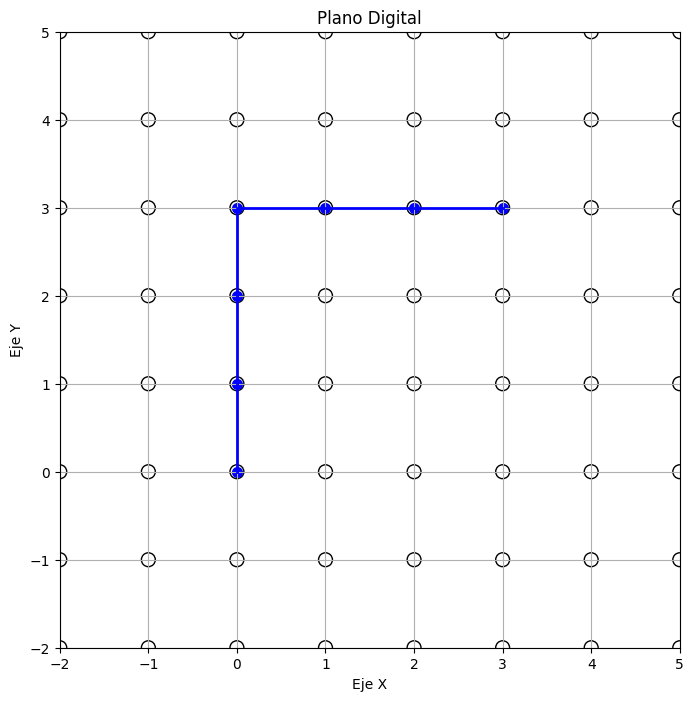

[(0, 0), (1, 1), (2, 2), (3, 3)]


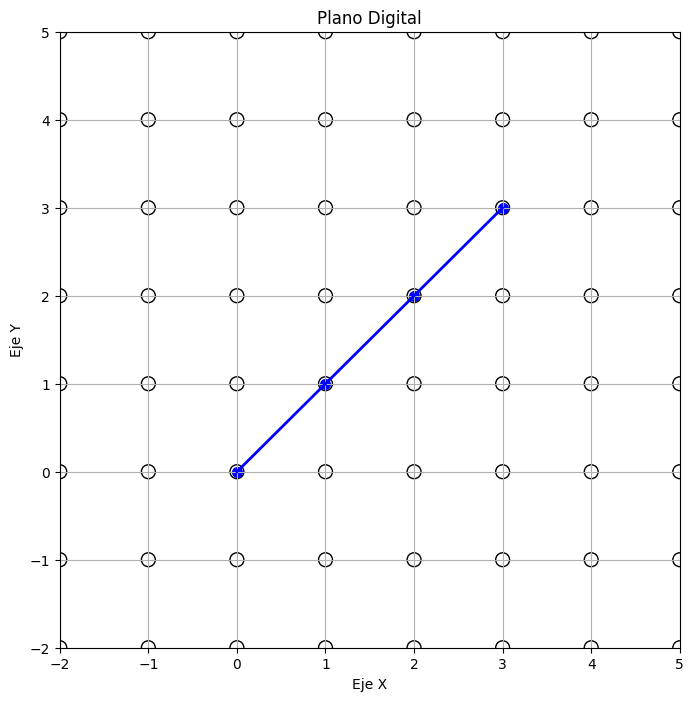

In [ ]:
# Función para crear un gráfico con puntos y una trayectoria lineal que pasa por los puntos en el orden dad

def graficarTrayecto(trayecto):

    # Verifica si el conjunto está vacío
    if not trayecto:
        print("El conjunto está vacío.")
        return

    # Separa las coordenadas x y y en listas separadas
    x_values, y_values = zip(*trayecto)

    # Calcula los valores mínimos y máximos de x e y en el conjunto
    min_x, max_x = min(x_values), max(x_values)
    min_y, max_y = min(y_values), max(y_values)

    # Ajusta el rango y el tamaño del gráfico en función de los valores mínimos y máximos
    x_range = range(min_x - 2, max_x + 3)
    y_range = range(min_y - 2, max_y + 3)

    # Crea una lista de coordenadas de todos los puntos posibles en el rango
    todos_los_puntos = [(x, y) for x in x_range for y in y_range]

    # Separa las coordenadas x e y de todos los puntos posibles
    x_todos, y_todos = zip(*todos_los_puntos)

    # Crea el gráfico
    plt.figure(figsize=(8, 8))  # Ajusta el tamaño del gráfico
    plt.scatter(x_todos, y_todos, marker='o', facecolor='none', edgecolor='black', s=100)
    plt.scatter(x_values, y_values, color='blue', linewidth=2)
    plt.plot(x_values, y_values, color='blue', linewidth=2)
    plt.grid(True)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Plano Digital')
    plt.xlim(min_x - 2, max_x + 2)  # Ajusta los límites del gráfico
    plt.ylim(min_y - 2, max_y + 2)

    plt.show()

import networkx as nx

def encontrar_trayectoria(P, Q, tipo_trayectoria, S = None):

    #si S no se especifica Wntonces crea un reticulo

    if S is None:
        S = [(x, y) for x in range(P[0], Q[0] + 1) for y in range(P[1], Q[1] + 1)]

    if P not in S or Q not in S:
        # Si P o Q no están en S, retorna un camino vacío
        return []

    G = nx.Graph()
    G.add_nodes_from(S)

    for node in S:
        vecinos = vecindad(node, tipo_trayectoria)
        for vecino in vecinos:
            if vecino in S:
                G.add_edge(node, vecino)

    if nx.has_path(G, source=P, target=Q):
        camino = nx.shortest_path(G, source=P, target=Q)
        return camino
    else:
        # Si no existe un camino de P a Q en S, retorna un camino vacío
        return []


if __name__=="__main__":

    #figura 3.3

    #puntosss de prueba
    P = (0, 0)
    Q = (3, 3)

    trayectoria4N = encontrar_trayectoria(P, Q, "4N")
    trayectoria8N = encontrar_trayectoria(P, Q, "8N")

    #camino 4N
    print(trayectoria4N)
    graficarTrayecto(trayectoria4N)

    #camino 8N
    print(trayectoria8N)
    graficarTrayecto(trayectoria8N)


## **Definición 3.4: Conectividad de dos puntos.**
Dos puntos $P$ y $Q$ "están conectados en $S$” si existe un camino desde $P$ hasta $Q$ que se
compone totalmente de puntos de $S$.
Según sea un camino $4N$ o un camino $8N$, diremos que “$P$ y $Q$ tienen conectividad $4N$
en $S$” o bien “$P$ y $Q$ tienen conectividad $8N$ en $S$”.

In [ ]:
def conectividad(P, Q, tipo_trayectoria="4N", S=None):
    print(encontrar_trayectoria(P,Q, tipo_trayectoria, S))
    if not encontrar_trayectoria(P,Q, tipo_trayectoria, S):
        
        return False
    else:
        return True
    
if __name__=="__main__":

    #Ejemplo 3.2

    #ccconjunto de prueba
    S=[(2,1),(3,1),(2,2), (3,3)]

    #puntosss de prueba
    P = (2, 1)
    Q = (3,3)

    #si existe concetividad entre los puntos regresa true y si no false
    print(conectividad(P,Q,"4N",S))
    print(conectividad(P,Q,"8N",S))

[]
False
[(2, 1), (2, 2), (3, 3)]
True


## **Proposición 3.1**
Dado $S$ un subconjunto no vacío de $\Pi$ , se define la siguiente relación “ $∼$ “ en $S$:
$P ∼ Q$ si y sólo si $P$ y $Q$ están conectados en $S$.
Entonces dicha relación es de equivalencia.

Las clases de equivalencia definidas por esta relación reciben el
nombre de “componentes conexas”. Más precisamente.

## **Definición 3.5: Componentes conexas de un conjunto.**
Sea S un subconjunto no vacío de $\Pi$ y “ $∼$ “ la relación de equivalencia definida en $S$
mediante
$P ∼ Q$ si y sólo si $P$ y $Q$ están conectados en $S$.
Entonces las clases de equivalencia de $S$ reciben el nombre de componentes conexas
de $S$.

In [ ]:

def componentes_conexas(S, tipo_trayectoria="4N"):
    # Crea un grafo vacío
    G = nx.Graph()

    # Agrega los nodos de S al grafo
    G.add_nodes_from(S)

    # Conecta los nodos de S si están conectados
    for P in S:
        for Q in S:
            if P != Q and encontrar_trayectoria(P, Q, tipo_trayectoria, S=S):
                G.add_edge(P, Q)

    # Calcula las componentes conexas
    componentes = list(nx.connected_components(G))

    return componentes


if __name__=="__main__":
    # Ejemplo de uso: Ejemplo 3.3
    S = {(4,2), (3,3), (5,3), (4,4)} 
    #S = {(1, 1), (1, 2), (2, 2), (3, 3), (4, 4), (4, 5)}
    componentes_8N = componentes_conexas(S, tipo_trayectoria="8N")  
    componentes_4N = componentes_conexas(S, tipo_trayectoria="4N")

    print("Componentes conexas (8N):", componentes_8N)
    print("Componentes conexas (4N):", componentes_4N)


Componentes conexas (8N): [{(5, 3), (3, 3), (4, 4), (4, 2)}]
Componentes conexas (4N): [{(5, 3)}, {(3, 3)}, {(4, 2)}, {(4, 4)}]


## **Definición 3.6: Conjunto conexo.**
Si $S$ es un subconjunto no vacío de $\Pi$ entonces
$S$ es “$4N$ conexo” si tiene una sola componente $4N$ conexa.
$S$ es “$8N$ conexo” si tiene una sola componente $8N$ conexa.

In [ ]:
import networkx as nx

def es_conexo(S, tipo_trayectoria):
    componentes = componentes_conexas(S, tipo_trayectoria)
    return len(componentes) == 1

if __name__=="__main__":
    # Ejemplo de uso: Ejemplo 3.3
    S = {(4,2), (3,3), (5,3), (4,4)} 
    #S = {(1, 1), (1, 2), (1, 3), (2, 3)}
    #S = {(1, 1), (1, 2), (2, 2), (3, 3), (4, 4), (4, 5)}

    print(S)
    print("S es 4N conexo:", es_conexo(S, "4N"))
    print("S es 8N conexo:", es_conexo(S, "8N"))


{(5, 3), (3, 3), (4, 2), (4, 4)}
S es 4N conexo: False
S es 8N conexo: True


## **Definición 3.7: Conjunto topológicamente conexo.**
Sea $S$ un subconjunto no vacío de $\Pi$ . Diremos que
$S$ es topológicamente conexo si lo es en la topología relativa a $\tau_{\Pi}$ de $\Pi$. Es decir ,
Si $S = A \cup B$ con $A$, $B$ abiertos en $S$ tales que $A \cap B = \empty$ ⇒ $A = ∅$ ó $B = \empty$.

## **Proposición 3.2**
Sea $S$ un subconjunto no vacío de $\Pi$ . Entonces
$S$ es topológicamente conexo si y sólo si es $4N$ conexo.

In [ ]:
def es_topologicamente_conexo(S):
    # Verificar si S es 4N conexo
    return es_conexo(S, tipo_trayectoria="4N")


if __name__=="__main__":
    # Ejemplo de uso:
    #S = {(1, 1), (1, 2), (2, 2)}
    S = {(1, 1), (1, 2), (2, 2), (4, 4)}

    print(S)
    print("S es topológicamente conexo:", es_topologicamente_conexo(S))



{(4, 4), (1, 1), (1, 2), (2, 2)}
S es topológicamente conexo: False


## **Definición 3.8: Tipos de conectividad para un subconjunto y su complemento.**
Sea $S$ un subconjunto no vacío de $\Pi$ . Entonces
Si consideramos conectividad $4N$ para $S$, en $ \overline{S}$ deberemos tomar conectividad $8N$.\
En cambio,\
Si consideramos conectividad $8N$ para $S$, en $ \overline{S}$ deberemos tomar conectividad $4N$.

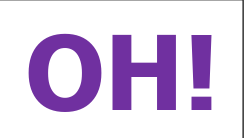

/tmp/ipykernel_46822/495947515.py:71: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(estilo_color_html)


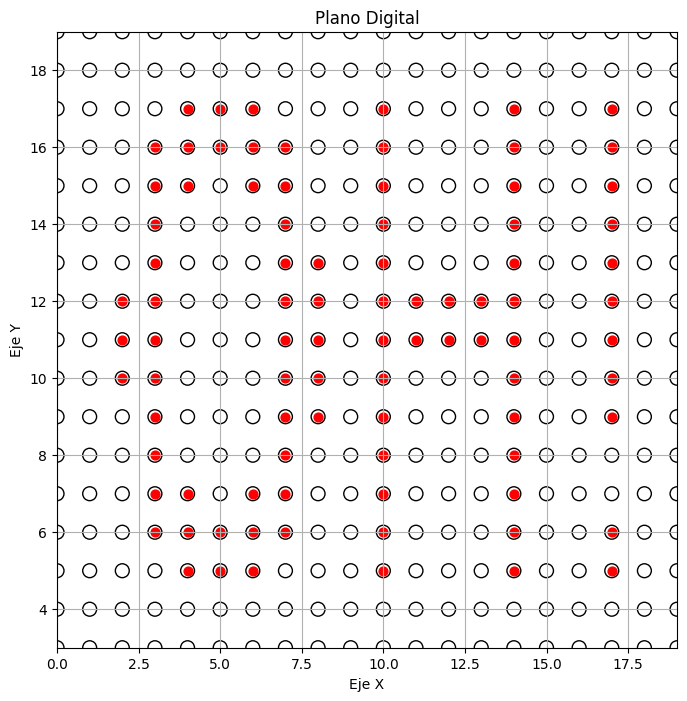

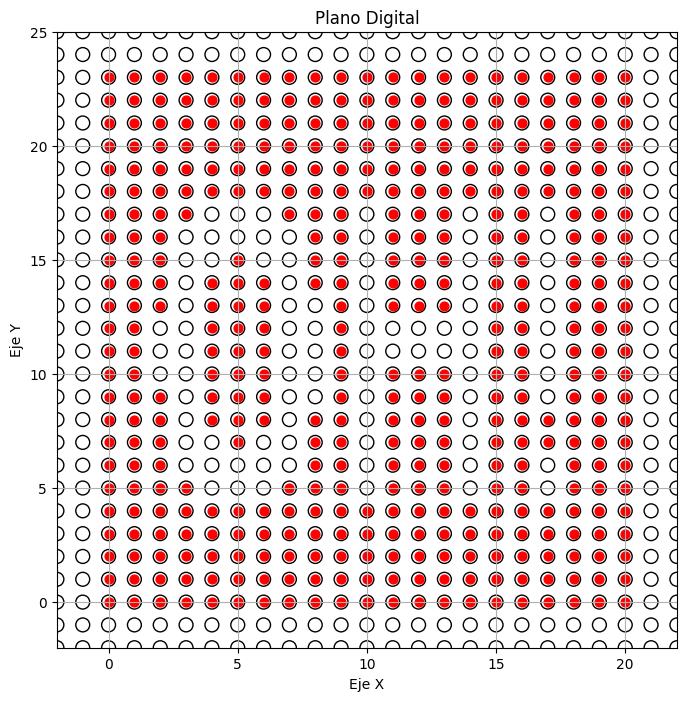

[{(6, 15), (3, 7), (4, 6), (3, 10), (3, 16), (4, 15), (3, 13), (8, 9), (5, 16), (8, 12), (2, 11), (7, 7), (6, 5), (7, 10), (7, 16), (7, 13), (6, 17), (4, 5), (3, 9), (5, 6), (3, 6), (3, 12), (4, 17), (3, 15), (8, 11), (2, 10), (7, 9), (6, 7), (7, 6), (7, 12), (6, 16), (7, 15), (4, 7), (3, 11), (3, 8), (5, 5), (3, 14), (4, 16), (8, 10), (5, 17), (8, 13), (2, 12), (6, 6), (7, 11), (7, 8), (7, 14)}, {(17, 17), (17, 10), (17, 16), (17, 13), (17, 9), (17, 12), (17, 15), (17, 11), (17, 14)}, {(14, 7), (14, 10), (14, 16), (14, 13), (10, 6), (10, 9), (10, 12), (13, 11), (11, 11), (10, 15), (14, 6), (12, 12), (14, 9), (14, 12), (14, 15), (10, 5), (10, 11), (10, 8), (10, 14), (10, 17), (12, 11), (14, 5), (14, 11), (14, 8), (14, 14), (14, 17), (10, 7), (10, 13), (11, 12), (10, 10), (10, 16), (13, 12)}, {(17, 5), (17, 6)}]
cantidad de clases de equivalencia: 4


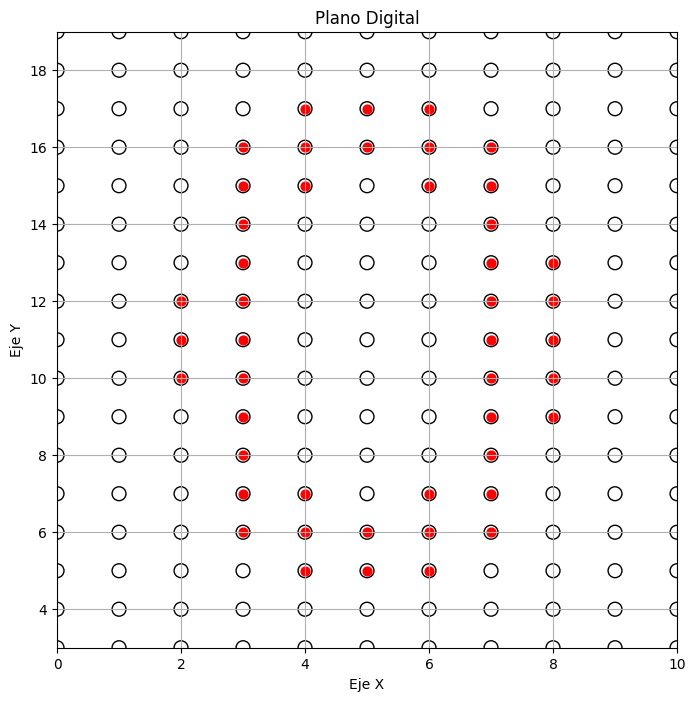

In [ ]:
#Segmentacion blanco y negro
def segmentacion_BN(matrizImg, setRelativo):

    matriz = matrizImg[::-1]  # Invertir la matriz verticalmente

    S = {(x, y) for y, vector in enumerate(matriz) for x, element in enumerate(vector) if element == 0}

    return S, complement(S, setRelativo)

def complement(subconjunto, setRelativo):
    return setRelativo - subconjunto


if __name__ == "__main__":
    # Ruta de la imagen PNG que deseas procesar (debe ser una imagen RGBA)
    #imagen_ruta = 'triangle.png'
    #imagen_ruta = 'ship.png'
    #imagen_ruta = 'recta.png'
    imagen_ruta =  'OH.png'

    # Resolución de pixeles de la cuadrícula (número de divisiones)
    ancho, alto = 21, 24
    resolucion = (ancho, alto)  # Cambia este valor según tus necesidades

    # Abrir la imagen
    imag = Image.open(imagen_ruta)

    #imprimir imagen
    display(imag)

    #figura 1.1 del articulo
    
    # Obtener la matriz de imagen digital
    # Se puede cambiar el tipo si se quiere blanco y negro ("B/N")
    # si quieres grises ("Gray")
    # si quieres RGB es por defecto "RGB"
    matriz = matrizImagenDigital(imag, resolucion, 'B/N')
    #Ejemplo 3.5: modificado
    matriz_a_img_DF(matriz)
    #representacion del plano digital
    conjuntoEspacioTopo = conjImgDigital(matriz)
    #su topologia
    #baseTopo = topoHereda(matriz)
    #Segmentar la imagen en subconjnunto de puntos
    parteNegra, parteblanca = segmentacion_BN(matriz, conjuntoEspacioTopo)
    #graficar la parte negra en el plano digital
    graficarPlanoDigital(parteNegra)
    graficarPlanoDigital(parteblanca)
    #graficar la parte blanca en el plano digital
    #graficarPlanoDigital(parteBlanca)
    componentes = componentes_conexas(parteNegra)
    print(componentes)
    #cantidad de componetes conexas
    print("cantidad de clases de equivalencia:" ,len(componentes))
    graficarPlanoDigital(componentes[0])
    

## **Proposición 3.3**
Sea $S$ un subconjunto no vacío de una imagen digital $\Pi$ de $M \times N$ píxeles. Entonces
existe una única componente ($4N$ u $8N$) conexa de $S$ que contiene al borde de $\Pi$.

## **Definición 3.9: Fondo y agujeros de un conjunto**
Sea $S$ un subconjunto no vacío de una imagen digital $\Pi$. Entonces
El “Fondo de $S$” es la única componente conexa de $\overline{S}$ que contiene a Borde ($\Pi$).
Las demás componentes de $\overline{S}$ , si existen, reciben el nombre de “agujeros de $S$”.

[{(4, 0), (3, 1), (5, 4), (5, 1), (0, 2), (0, 5), (1, 0), (2, 5), (1, 3), (3, 0), (4, 5), (3, 3), (5, 0), (5, 3), (0, 1), (2, 4), (1, 2), (0, 4), (2, 1), (1, 5), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4)}]
[{(4, 0), (3, 1), (5, 4), (5, 1), (0, 2), (0, 5), (1, 0), (2, 5), (1, 3), (3, 0), (4, 5), (5, 0), (5, 3), (0, 1), (2, 4), (1, 2), (0, 4), (2, 1), (1, 5), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4)}, {(3, 3)}]


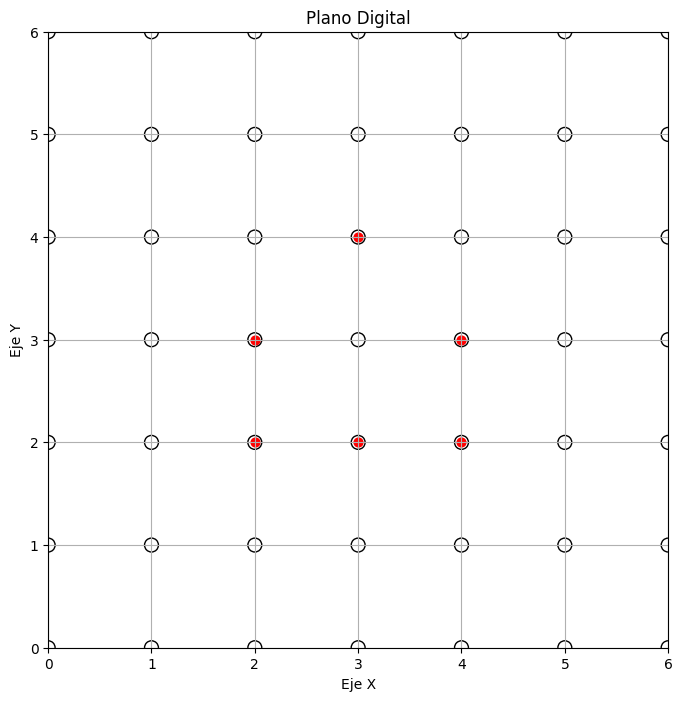

=== Tipo 4N para S, entonces el complemento es 8N===
Fondo de S: {(4, 0), (3, 1), (5, 4), (5, 1), (0, 2), (0, 5), (1, 0), (2, 5), (1, 3), (3, 0), (4, 5), (3, 3), (5, 0), (5, 3), (0, 1), (2, 4), (1, 2), (0, 4), (2, 1), (1, 5), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4)}
Agujeros de S: []
=== Tipo 8N para S, entonces el comlemento es 4N===
Fondo de S: {(4, 0), (3, 1), (5, 4), (5, 1), (0, 2), (0, 5), (1, 0), (2, 5), (1, 3), (3, 0), (4, 5), (5, 0), (5, 3), (0, 1), (2, 4), (1, 2), (0, 4), (2, 1), (1, 5), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4)}
Agujeros de S: {(3, 3)}


In [ ]:
def fondo_y_agujeros_BN(S, dimensionEspatopo, tipo="4N"):

    conjuntoEspaTopo = conjImgDigital((dimensionEspatopo[0]+1, dimensionEspatopo[1]+1))
    # Calcular el complemento de S en Π
    complemento_S = complement(S, conjuntoEspaTopo)
    # Calcular las componentes conexas del complemento de S
    if tipo == "4N":
        componentes = componentes_conexas(complemento_S, tipo_trayectoria= "8N")
    else:
        componentes = componentes_conexas(complemento_S, tipo_trayectoria= "4N")

    # Encontrar el borde de Π
    bordeEspaTopo = borde(dimensionEspatopo)

    # Inicializar el fondo y la lista de agujeros
    fondo = None
    agujeros = []

    # Verificar si cada componente contiene el borde
    print(componentes)
    for componente in componentes:
        if bordeEspaTopo.issubset(componente):
            fondo = componente
        else:
            agujeros = componente

    return fondo, agujeros

if __name__ == "__main__":
    #Ejemplo 3.6
    #dimension 5, 5 es maximo 0 
    dime = (5, 5)
    #a) Hallar el fondo y los posibles agujeros de S, si se considera conectividad 8N para S.
    S = {(2,2), (3,2), (4,2), (2,3), (4,3), (3,4)}
    fondo4N, agujeros4N = fondo_y_agujeros_BN(S, dime,"4N")
    fondo8N, agujeros8N = fondo_y_agujeros_BN(S, dime,"8N")
    graficarPlanoDigital(S)
    print("=== Tipo 4N para S, entonces el complemento es 8N===")
    print("Fondo de S:", fondo4N)
    print("Agujeros de S:", agujeros4N)
    #b) Determinar el fondo y los posibles agujeros de S, tomando conectividad 4N para S.
    print("=== Tipo 8N para S, entonces el comlemento es 4N===")
    print("Fondo de S:", fondo8N)
    print("Agujeros de S:", agujeros8N)


## **Definición 3.10: Conjunto simplemente conexo**
Sea $S$ un subconjunto no vacío de una imagen digital $\Pi$. Entonces $S$ es **simplemente
conexo** si no tiene agujeros.

In [ ]:
def conjSimpleConex(S,dime, tipo = "4N"):
    agujeros = fondo_y_agujeros_BN(S, dime,tipo)[1]
    if not agujeros:
        return True
    else:
        return False
    
if __name__ == "__main__":
    #ejemplo anterior
    dime = (5, 5)
    S = {(2,2), (3,2), (4,2), (2,3), (4,3), (3,4)}
    print("El conjunto S es conexo (tipo 4N)", conjSimpleConex(S, dime, tipo="4N"))
    print("El conjunto S es conexo (tipo 8N)", conjSimpleConex(S, dime, tipo="8N"))
    
    
    
## **Ejemplo 3.7**
## En el ejemplo anterior, si consideramos conectividad 4N para S, éste es simplemente
## conexo pues no tiene agujeros.

[{(4, 0), (3, 1), (5, 4), (5, 1), (0, 2), (0, 5), (1, 0), (2, 5), (1, 3), (3, 0), (4, 5), (3, 3), (5, 0), (5, 3), (0, 1), (2, 4), (1, 2), (0, 4), (2, 1), (1, 5), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4)}]
El conjunto S es conexo (tipo 4N) True
[{(4, 0), (3, 1), (5, 4), (5, 1), (0, 2), (0, 5), (1, 0), (2, 5), (1, 3), (3, 0), (4, 5), (5, 0), (5, 3), (0, 1), (2, 4), (1, 2), (0, 4), (2, 1), (1, 5), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4)}, {(3, 3)}]
El conjunto S es conexo (tipo 8N) False


## <center>*====Arcos y Curvas====*</center>

## **Definición 3.11: Arco**
Un subconjunto $S$ de una imagen digital $\Pi$ es un arco si es conexo y todos, salvo dos
de sus puntos (sus “extremos”) tienen exactamente dos vecinos en $S$, mientras que los
dos extremos tienen exactamente uno. Más precisamente,
Un arco $S$ es un camino $P_{0}, P_{1}, …, P_{n}$ formado por puntos distintos y tal que $P_{i}$ es
vecino de $P_{j} \Leftrightarrow  j = i ± 1$ .


/tmp/ipykernel_46822/3087124318.py:65: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([x, vecino[0]], [y, vecino[1]], 'b-', linestyle='solid')


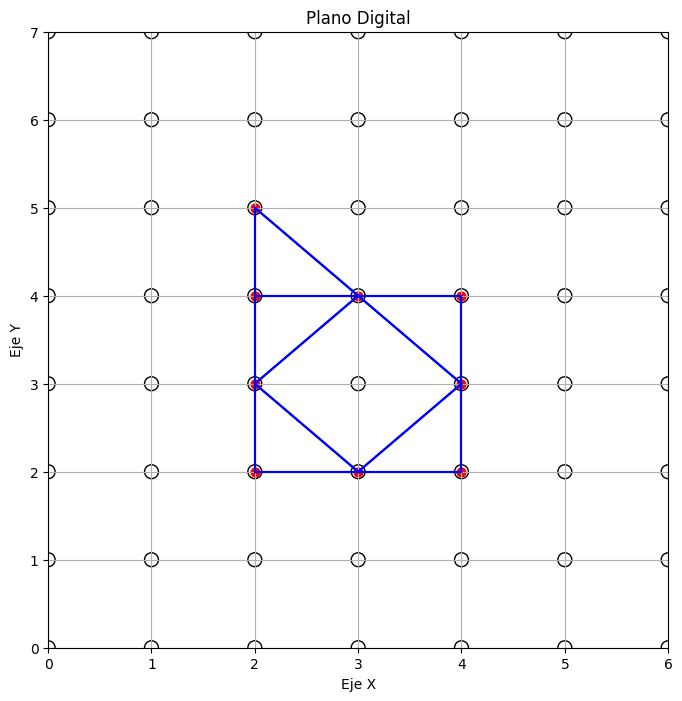

{(4, 4), (2, 4), (3, 4), (4, 3), (4, 2), (2, 3), (2, 2), (3, 2), (2, 5)}
S es arco 4N: False
S es arco 8N: False


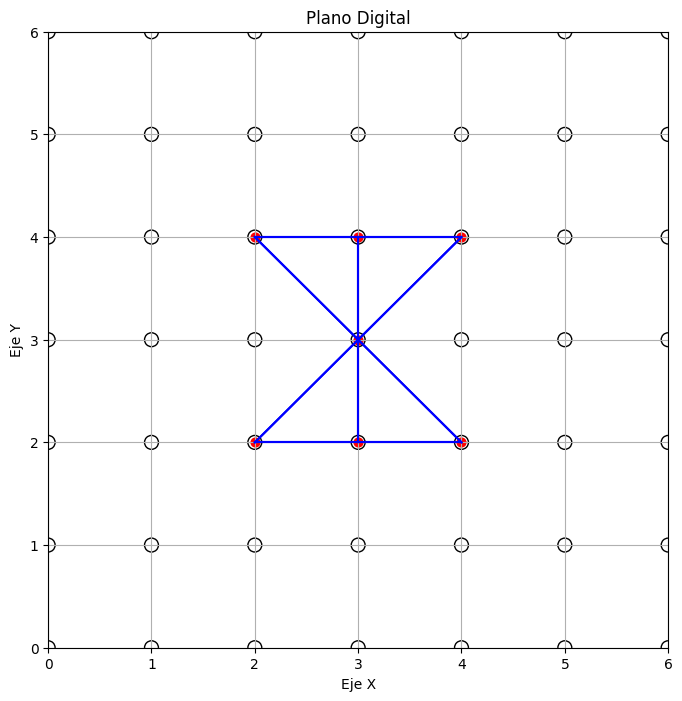

{(4, 4), (2, 4), (3, 3), (3, 4), (2, 2), (3, 2), (4, 2)}
S es arco 4N: False
S es arco 8N: False


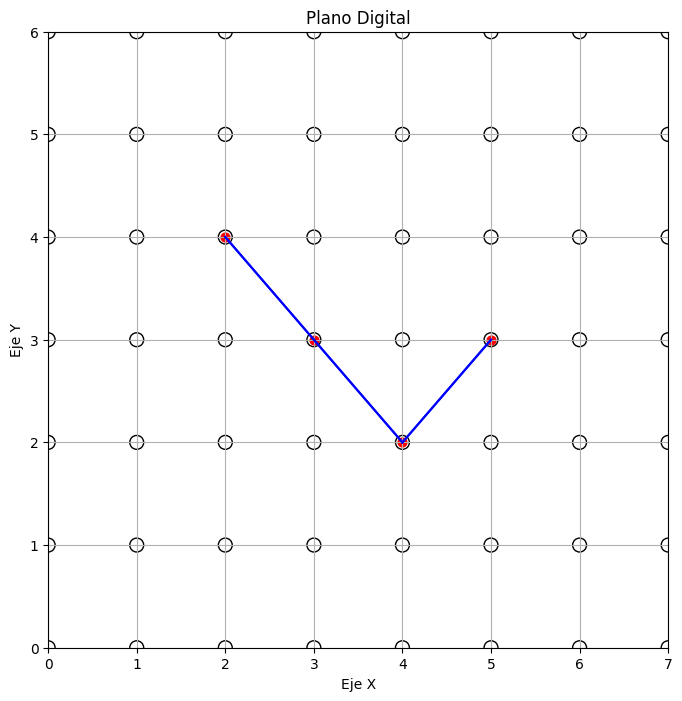

{(5, 3), (2, 4), (3, 3), (4, 2)}
S es arco 4N: False
S es arco 8N: True


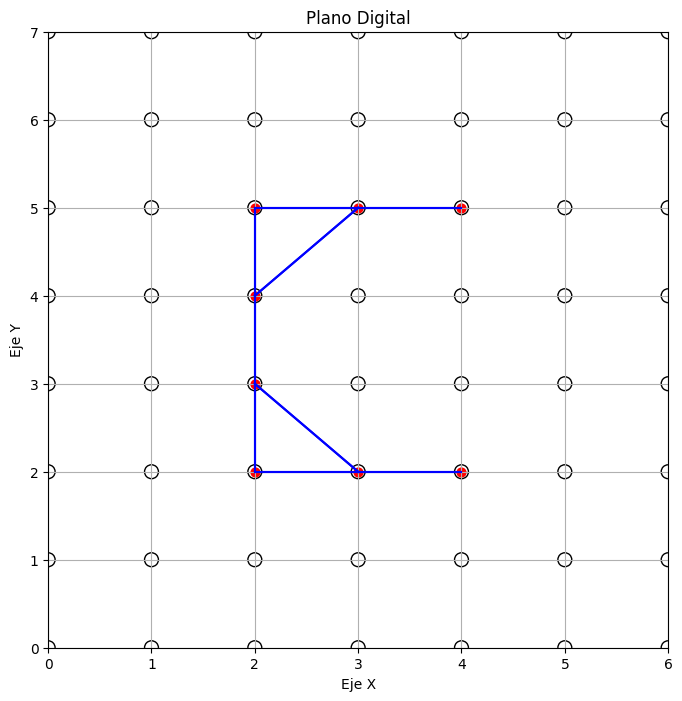

{(2, 4), (4, 2), (2, 3), (4, 5), (2, 2), (3, 2), (2, 5), (3, 5)}
S es arco 4N: True
S es arco 8N: False


In [ ]:
def es_arco(S, tipo_trayectoria = "4N"):
    #crear un diccionaario donde se almacene punto y sus vecinos
    relacion_S = {}
    #llamar a los 4N
    for elemento in S:
        vecindad_S = set(vecindad(elemento, tipo_trayectoria))
        interseccion = vecindad_S.intersection(S)
        relacion_S[elemento] = len(interseccion)-1

    # Encontrar el valor mínimo
    valor_minimo = min(relacion_S.values())

    # Encontrar todas las claves asociadas al valor mínimo
    puntosMinimos = [clave for clave, valor in relacion_S.items() if valor == valor_minimo]

    #comparar trayectoria con el conjunto S
    if valor_minimo == 1 and len(puntosMinimos) == 2:
        trayectoria = encontrar_trayectoria(puntosMinimos[0], puntosMinimos[1], tipo_trayectoria, S)
        if set(trayectoria) ==  S:
            return True, trayectoria
        else:
            return False, trayectoria
        
    return False, []



def graficar_trayectorias_set(conjunto, tipo_trayectoria='4N'):
    # Convierte el conjunto en una lista de coordenadas de puntos enteros
    puntos = list(conjunto)

    # Verifica si el conjunto está vacío
    if not puntos:
        print("El conjunto está vacío.")
        return

    # Separa las coordenadas x y y en listas separadas
    x_values, y_values = zip(*puntos)

    # Calcula los valores mínimos y máximos de x e y en el conjunto
    min_x, max_x = min(x_values), max(x_values)
    min_y, max_y = min(y_values), max(y_values)

    # Ajusta el rango y el tamaño del gráfico en función de los valores mínimos y máximos
    x_range = range(min_x - 2, max_x + 3)
    y_range = range(min_y - 2, max_y + 3)

    # Crea una lista de coordenadas de todos los puntos posibles en el rango
    todos_los_puntos = [(x, y) for x in x_range for y in y_range]

    # Separa las coordenadas x e y de todos los puntos posibles
    x_todos, y_todos = zip(*todos_los_puntos)

    # Crea el gráfico
    plt.figure(figsize=(8, 8))  # Ajusta el tamaño del gráfico
    plt.scatter(x_todos, y_todos, marker='o', facecolor='none', edgecolor='black', s=100)
    plt.scatter(x_values, y_values, marker='o', color='r', s=40)

    # Dibuja líneas entre cada punto y sus vecinos dentro del conjunto
    for punto in conjunto:
        x, y = punto
        vecinos = vecindad(punto, tipo_trayectoria)
        for vecino in vecinos:
            if vecino in conjunto:
                plt.plot([x, vecino[0]], [y, vecino[1]], 'b-', linestyle='solid')

    plt.grid(True)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Plano Digital')
    plt.xlim(min_x - 2, max_x + 2)  # Ajusta los límites del gráfico
    plt.ylim(min_y - 2, max_y + 2)

    # Muestra el gráfico
    plt.show()


if __name__ == "__main__":

    #Ejemplo 3.8 
    # Para cada una de las siguientes imágenes digitales de 6 x 6 píxeles, indicar si el
    # subconjunto S es un arco 4N, 8N o ninguno de los dos.
    dime = (6, 6)
    conjuntos = [{(2,5), (2,4), (2,3), (2,2), (3,2), (4,2), (4,3), (4,4), (3,4)},
                 {(2,2), (3,2), (4,2), (3,3), (2,4), (3,4), (4,4)},
                 {(2,4), (3,3), (4,2), (5,3)},
                 {(4,5), (3,5), (2,5), (2,4), (2,3), (2,2), (3,2), (4,2)}]
    
    for conjunto in conjuntos:
        esArco4N, trayecto4N = es_arco(conjunto, "4N")
        esArco8N, trayecto8N = es_arco(conjunto, "8N")  

        
        graficar_trayectorias_set(conjunto, "8N")
        print(conjunto)
        print("S es arco 4N:", esArco4N)
        print("S es arco 8N:", esArco8N)




## **Proposición 3.4**
Sea $P = (x, y)$ un punto del plano digital $\Pi$. Consideremos el conjunto
$N(P) = \{Q\in Pi : \text{Q es vecino 8N de P} \}$
Entonces


- $N(P) – \{P \}$ es 4N conexo
- Si Q es un vecino 8N de P entonces $N(P) – \{ P, Q \}$ es 4N conexo.

## **Proposición 3.5**
Sea $S$ un subconjunto de una imagen digital $\Pi$ tal que $S = \{a, b \}$ donde $a$ y $b$ son
vecinos $8N$. Entonces $S$ es $4N$ conexo.

## **Proposición 3.6**
Si $S\subset  \Pi$ es un arco entonces $S$ es simplemente conexo.

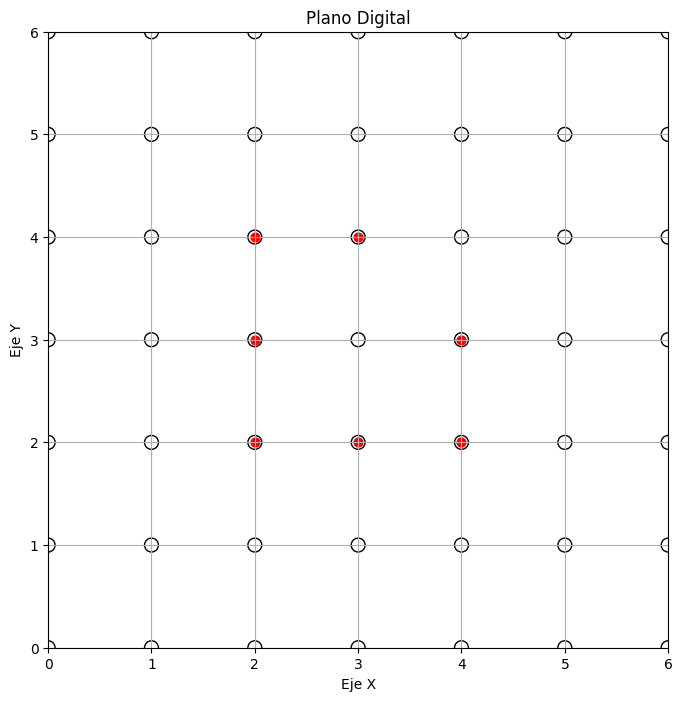

NameError: name 'es_arco' is not defined

In [ ]:
def conjuntoSimpleConexo(S , tipo =  "4N"):
    if es_arco(S, tipo):
        return True
    else:
        return False
    

if __name__ == "__main__":
    #Sea Π la imagen digital de 6 x 6 píxeles y S el subconjunto definido por
    S = {(2,2), (2,3), (2,4), (3,2), (3,4), (4,2), (4,3)}
    graficarPlanoDigital(S)
    print("El conjunto S es simplemente conexo(4N) :", conjuntoSimpleConexo(S, tipo = "4N"))
    print("El conjunto S es simplemente conexo(N) :", conjuntoSimpleConexo(S, tipo = "8N"))
    

## **Definición 3.12: Curva**
Un subconjunto $S$ de una imagen digital $\Pi$ es una curva si es conexo y todos sus
puntos tienen exactamente dos vecinos en $S$. Más precisamente,
Una curva $S$ es un camino $P_{0}, P_{1}, …, P_{n}$ formado por puntos distintos y tal que
$P_{i}$ es vecino de $P_{j} ⇔ ( ( j = i ± 1 ) ∨ ( i = 0 ∧ j = n) ∨ ( j = 0 ∧ i = n) )$.

/tmp/ipykernel_46822/3087124318.py:65: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([x, vecino[0]], [y, vecino[1]], 'b-', linestyle='solid')


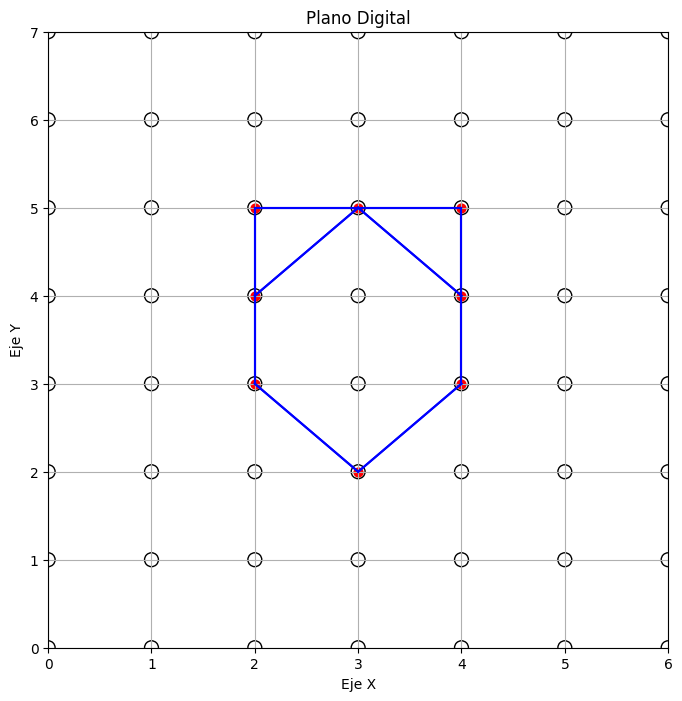

S {(4, 4), (2, 4), (4, 3), (2, 3), (4, 5), (3, 2), (2, 5), (3, 5)}
¿Es una curva según la definición curva? (4N) False
¿Es una curva según la definición curva? (8N) False


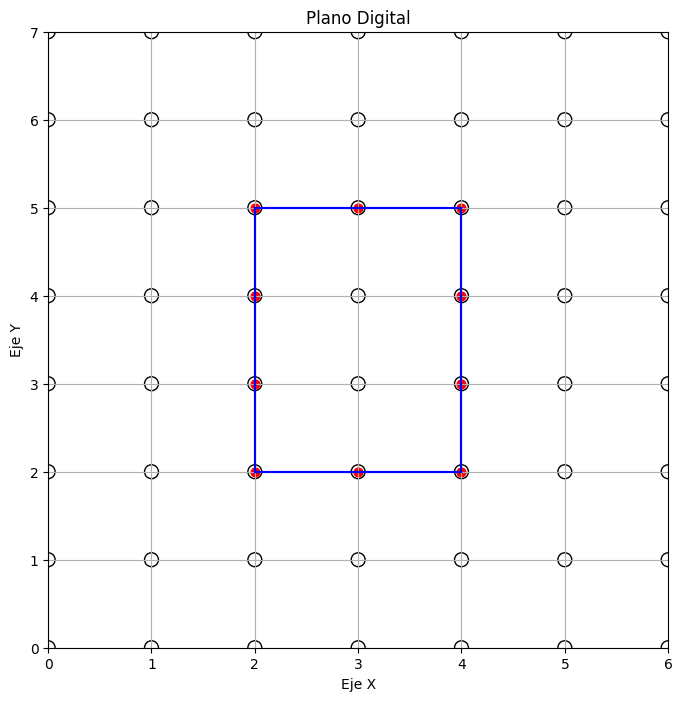

S = {(4, 4), (2, 4), (4, 3), (4, 2), (2, 3), (4, 5), (2, 2), (3, 2), (2, 5), (3, 5)}
¿Es una curva según la definición curva? (4N) True
¿Es una curva según la definición curva? (8N) False


In [ ]:
def es_curva(conjunto, tipo_vecindad='4N'):
    # Verificar si el conjunto es conexo
    if es_conexo(conjunto, tipo_vecindad):
        for punto in conjunto:
            # Obtener la vecindad del punto
            vecindadConjunto = set(vecindad(punto, tipo_vecindad)) - {punto}

            # Encontrar los vecinos del punto que están en S
            vecinoPuntoS = []
            for vecino in vecindadConjunto:
                # Verificar si el vecino está en S
                if any(vecino == punto_S for punto_S in conjunto):
                    vecinoPuntoS.append(vecino)

            # Verificar si el punto tiene exactamente dos vecinos en S
            if len(vecinoPuntoS) != 2:
                return False
            
    else:
        # Si el conjunto no es conexo, no cumple con la definición de curva
        return False
    
    # Si el conjunto cumple con todas las condiciones, es una curva
    return True



if __name__ == "__main__":
    # Ejemplo a)
    conjunto_s_a = {(2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (4, 4), (4, 3), (3, 2)}
    graficar_trayectorias_set(conjunto_s_a, "8N")
    resultado_4N_a = es_curva(conjunto_s_a, tipo_vecindad='4N')
    resultado_8N_a = es_curva(conjunto_s_a, tipo_vecindad='8N')
    print(f"S {conjunto_s_a}\n¿Es una curva según la definición curva? (4N) {resultado_4N_a}")
    print(f"¿Es una curva según la definición curva? (8N) {resultado_8N_a}")

    # Ejemplo b)
    conjunto_s_b = {(2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (4, 4), (4, 3), (4, 2), (3, 2)}
    graficar_trayectorias_set(conjunto_s_b)
    resultado_4N_b = es_curva(conjunto_s_b, tipo_vecindad='4N')
    resultado_8N_b = es_curva(conjunto_s_b, tipo_vecindad='8N') 
    print(f"S = {conjunto_s_b}\n¿Es una curva según la definición curva? (4N) {resultado_4N_b}")
    print(f"¿Es una curva según la definición curva? (8N) {resultado_8N_b}")


## **Proposición 3.7:**
Una curva $S \subset \Pi$ no puede ser $4N$ y además $8N$.

## **Teorema 3.8: Teorema de la curva de Jordan para curvas digitales.**
Sea $S$ una curva $4N$ en el plano digital $\mathbb{Z}^{2}$ . Entonces $\mathbb{Z}^{2} – S$ tiene exactamente dos
componentes $8N$ conexas. Una de ellas es acotada, llamada “el interior de $S$” y la otra
es no acotada, llamada “el exterior de $S$”.
De manera similar, si $S$ es una curva $8N$ en el plano digital $\mathbb{Z}^{2}$ entonces $\mathbb{Z}^{2} – S $ tiene
exactamente dos componentes $4N$ conexas.


## **Proposición 3.9:**
Si $S \subset \Pi$ es una curva, entonces $S$ tiene exactamente un agujero.

S= {(2, 4), (5, 5), (3, 4), (4, 3), (5, 4), (4, 2), (2, 3), (4, 5), (2, 2), (5, 3), (3, 2), (3, 5)}


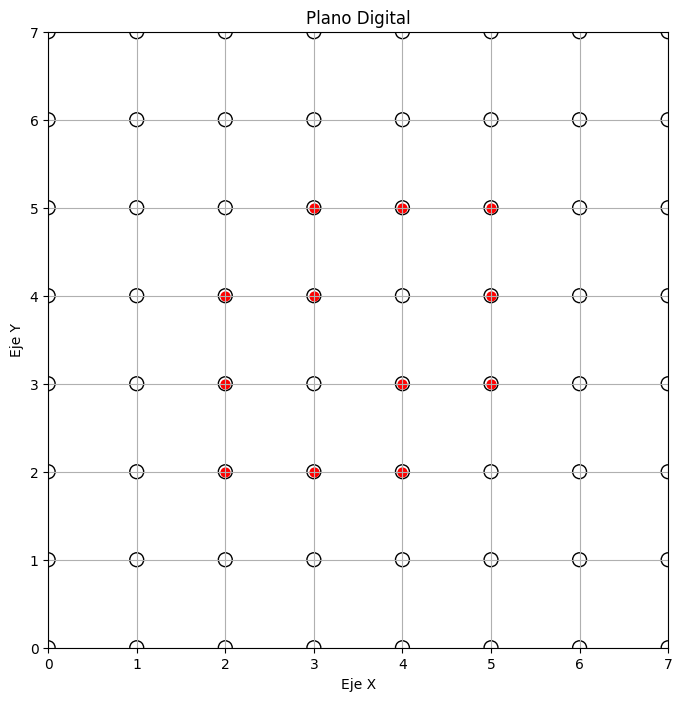

interior de S:(4N) {(4, 4), (3, 3)}
exterior de S:(4N) {(4, 0), (3, 1), (4, 6), (5, 1), (0, 2), (0, 5), (1, 0), (1, 6), (2, 5), (1, 3), (7, 4), (6, 2), (7, 1), (6, 5), (3, 0), (5, 0), (5, 6), (3, 6), (0, 1), (1, 2), (0, 4), (2, 1), (1, 5), (6, 1), (7, 0), (6, 4), (7, 3), (7, 6), (4, 1), (5, 2), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4), (0, 6), (2, 6), (7, 2), (6, 0), (6, 6), (7, 5), (6, 3)}
interior de S:(8N) None
exterior de S:(8N) None


In [ ]:
def teoremaCurvaJordan_IntExt(conjuntoS, dimensionEspa = (100, 100), tipo = "4N"):
    conjuntoEspaTopo = conjImgDigital((dimensionEspa[0]+1, dimensionEspa[1]+1))
    complementS = complement(conjuntoS, conjuntoEspaTopo)
    if es_curva(conjuntoS, tipo):

        if tipo == "4N" and es_conexo(complementS, "8N"):
            return None, None
        
        if tipo == "8N" and es_conexo(complementS, "4N"):
            return None, None

        bordeEspaTopo = borde(dimensionEspa)

        if tipo == "4N":
            componentes = componentes_conexas(complementS, "8N")
            if bordeEspaTopo.issubset(componentes[-1]):
                exterior = componentes[-1]
                componentes.remove(exterior)
                interior = componentes[-1]
                return exterior, interior
            else:
                interior = componentes[-1]
                componentes.remove(interior)
                exterior = componentes[-1]
                return exterior, interior
        else:
            componentes = componentes_conexas(complementS, "4N")
            if bordeEspaTopo.issubset(componentes[-1]):
                exterior = componentes[-1]
                componentes.remove(exterior)
                interior = componentes[-1]
                return  exterior, interior
            else:
                interior = componentes[-1]
                componentes.remove(interior)
                exterior = componentes[-1]
                return exterior, interior
    else:
        return None, None
                

if __name__ == "__main__":
    #Sea la siguiente curva
    S = {(2,2), (3,2), (4,2), (4,3), (5,3), (5,4), (5,5), (4,5), (3,5), (3,4),(2,4), (2,3)}
    #S = {(4,2), (3,3), (4,4), (5,3)}
    #S = {(2,3), (2,2), (3,2)}
    #proveniente de una imagen digital de 6 x 7 píxeles
    dimension = (6,7)
    print("S=",S)
    graficarPlanoDigital(S)
    exteriorS, interiorS = teoremaCurvaJordan_IntExt(S, dimension, "4N")
    print("interior de S:(4N)", interiorS)
    print("exterior de S:(4N)", exteriorS)

    #===================================
    exteriorS, interiorS = teoremaCurvaJordan_IntExt(S, dimension, "8N")
    print("interior de S:(8N)", interiorS)
    print("exterior de S:(8N)", exteriorS)



## **Proposición 3.10:**
Sea $S \subset \Pi$ una curva $8N$ . Entonces su fondo y agujero son topológicamente conexos.

## **Proposición 3.11:**
Sea $W$ un subconjunto de una imagen digital $\Pi$ y $A$ una componente conexa de $W$.
Sea $P_{0}, P_{1}, … , P_{n}$ un camino en $W$. Entonces
Si $P_{k} \in A$ para algún $0 ≤ k ≤ n ⇒ P_{i} \in A ∀ i = 0,…, n$

## **Proposición 3.12:**
Todo punto de una curva $S \subset \Pi$ es adyacente (en el sentido de conectividad de $\overline{S}$ ) a las
dos componentes de $\overline{S}$ .

# **Afinamiento**

## **Definición 3.13: Afinamiento de un conjunto**
El afinamiento de un subconjunto $S$ de una imagen digital $\Pi$ , es el proceso que
consiste en eliminar los puntos de $S$, sin cambiar las propiedades de conectividad o
simple conectividad de $S$, ni de su complemento $\overline{S}$.

##  **Proposición 3.13:**
Sea $S$ un subconjunto de una imagen digital $\Pi$ . Las siguientes propiedades del punto
$P \in S$ son equivalentes:

a) $S \cap N(P)$ tiene la misma cantidad de componentes (en el sentido de $S$) que
    $S \cap [N(P) – {P}] $.  

b) $S \cap N(P)$ tiene la misma cantidad de componentes (en el sentido de $\overline{S}$ ) que
    $[ \overline{S} \cap N(P) ] \cup {P}$.

c) $S \cap [N(P) - {P}]$ tiene exactamente una componente adyacente a $P$.
    (“componente” y “adyacente” en el sentido de $S$)

d) $\overline{S} \cap N(P)$ tiene exactamente una componente adyacente a $P$.
    (“componente” y “adyacente” en el sentido de $\overline{S}$ )

e) $S – { P }$ tiene la misma cantidad de componentes (en el sentido de  $S$) que $S$, y
    $\overline{S} ∪ {P}$ tiene la misma cantidad de componentes (en el sentido de $\overline{S}$ ) que $\overline{S}$ .

## **Definición 3.14: Punto Simple**
Sea $S$ un subconjunto de una imagen digital $\Pi$ ; un punto $P \in S$ es “simple” si verifica
las propiedades de la Proposición 3.13.

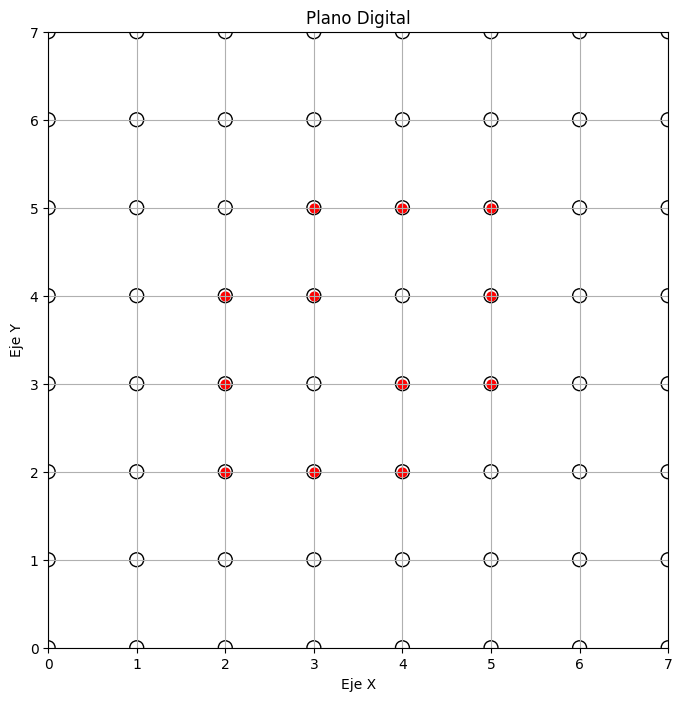

P =  (2, 2) es simple:(4N)  False
P =  (2, 2) es simple: (8N) True


In [ ]:
def es_puntoSimple(conjuntoS, punto, tipo="4N"):
    if punto in conjuntoS:
        vecinosPunto = set(vecindad(punto, "8N"))
        nuevoConjunto1 = conjuntoS & vecinosPunto
        nuevoConjunto2 = conjuntoS & (vecinosPunto - {punto})  # Corregido aquí
        componentesConj1 = componentes_conexas(nuevoConjunto1, tipo)
        componentesConj2 = componentes_conexas(nuevoConjunto2, tipo)
        #return len(componentesConj1) == 1 and len(componentesConj2) == 1
        return len(componentesConj1) == len(componentesConj2)
    return False

if __name__ == "__main__":
    S = {(2,2), (3,2), (4,2), (4,3), (5,3), (5,4), (5,5), (4,5), (3,5), (3,4),(2,4), (2,3)}
    graficarPlanoDigital(S)
    P = (2,2)
    print("P = ", P, "es simple:(4N) ", es_puntoSimple(S, P,"4N"))
    print("P = ", P, "es simple: (8N)", es_puntoSimple(S, P,"8N"))


## **Proposición 3.14:**
Sea $S$ un subconjunto de una imagen digital $\Pi$ y $P \in S$. Entonces:

a) Si $P$ es un punto” aislado”(no tiene otros vecinos en $S$) entonces $P$ no es simple.

b) Si $P$ es un punto “interior” (tiene todos sus vecinos $8N$ en $S$) entonces $P$ no es simple.

c) Si $P$ es un punto “final” (tiene exactamente un vecino en $S$) entonces $P$ es simple.

d) Si $S$ es simplemente conexo y $P$ es simple entonces $S – { P }$ es simplemente conexo.

e) Si $S$ es conexo y $P$ es simple entonces $S – {P}$ es también conexo.

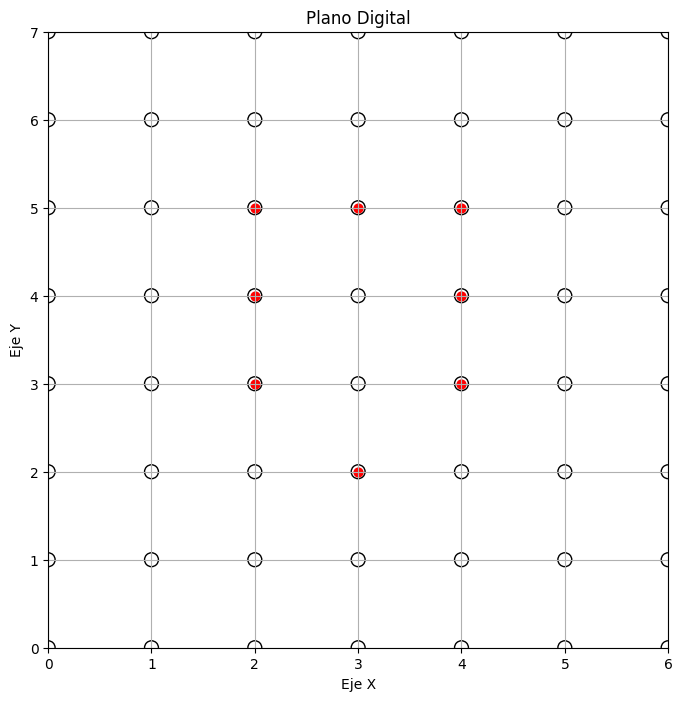

P =  (3, 2) es punto Aislado: (4N) True
P =  (3, 2) es punto interior: (4N) False
P =  (3, 2) es punto Final: (4N) False
P =  (3, 2) es punto Aislado: (8N) False
P =  (3, 2) es punto interior: (8N) False
P =  (3, 2) es punto Final: (8N) False


In [ ]:

def es_puntoAislado(conjuntoS, punto, tipo="4N"):
    #verificar si el punto esta en S
    if punto in conjuntoS:
        #encontrando vecinos de puno
        vecinosPunto = set(vecindad(punto, tipo))-{punto}

        #se escoge cada uno de los vecinos y se verifica si esta en S
        for vecino in vecinosPunto:
            if vecino in conjuntoS:
                return False
        return True
    return None

def es_puntoInterior(conjuntoS, punto, tipo = "4N"):
    if punto in conjuntoS:
        vecinosPunto = set(vecindad(punto , "8N"))-{punto}
        if vecinosPunto.issubset(conjuntoS):
            return True
        return False  
    return None

def es_puntoFinal(conjuntoS, punto, tipo="4N"):
    if punto in conjuntoS:
        vecinosPunto = set(vecindad(punto, tipo)) - {punto}
        count = 0

        for vecino in vecinosPunto:
            if vecino in conjuntoS:
                count += 1
                if count == 2:
                    return False  # Si hay más de un vecino en conjuntoS, no es punto fina
                
        if count == 1:
            return True  # Si llegamos aquí, el punto tiene 1 vecino en conjuntoS, es punto final
        return False
    return None  # Si el punto no está en conjuntoS, no podemos determinar si es punto final


if __name__ == "__main__":
    S = {(2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (4, 4), (4, 3), (3, 2)}
    graficarPlanoDigital(S)
    P = (3,2)
    print("================================================================")
    print("P = ", P, "es punto Aislado: (4N)", es_puntoAislado(S, P, "4N"))
    print("P = ", P, "es punto interior: (4N)", es_puntoInterior(S, P, "4N"))
    print("P = ", P, "es punto Final: (4N)", es_puntoFinal(S, P, "4N"))
    print("====================================================================")
    print("P = ", P, "es punto Aislado: (8N)", es_puntoAislado(S, P, "8N"))
    print("P = ", P, "es punto interior: (8N)", es_puntoInterior(S, P, "8N"))
    print("P = ", P, "es punto Final: (8N)", es_puntoFinal(S, P, "8N"))

## **Proposición 3.15:**
Sea $S$ un subconjunto simplemente conexo con más de dos puntos. Entonces $S$ tiene al
menos dos puntos simples.

# ===**Afinamiento de conjuntos simplemente conexos**===

## **Teorema 3.16:**
Un subconjunto $S \subset \Pi$ es un arco $\Leftrightarrow $ es simplemente conexo y tiene exactamente dos
puntos simples.

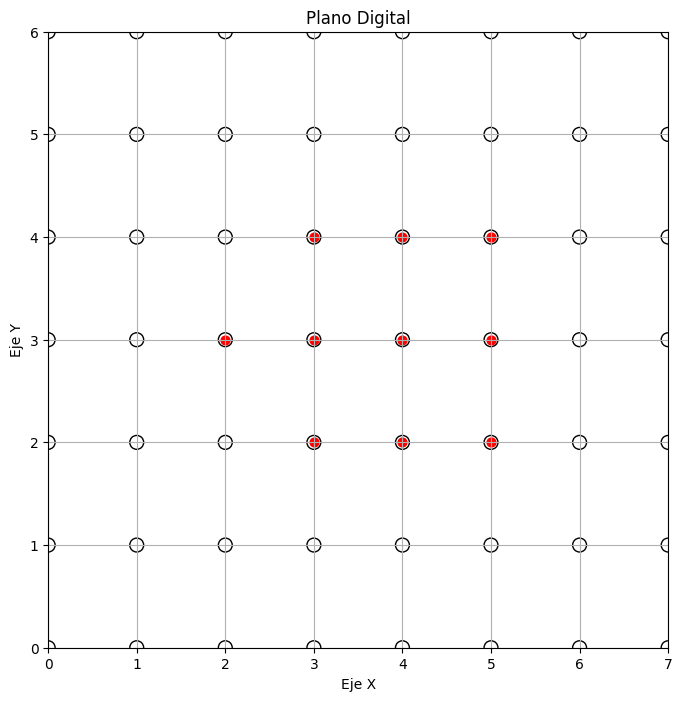

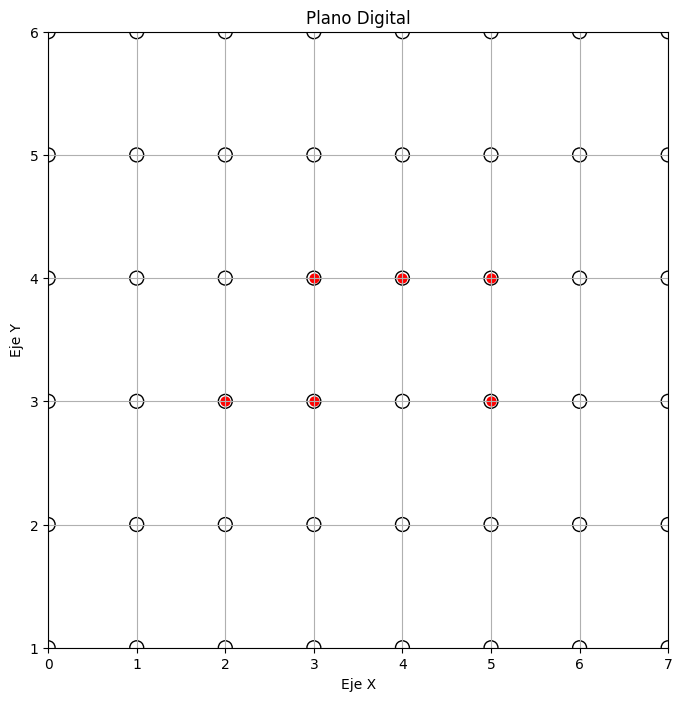

In [ ]:
def afinamientoConjunto_simpleconexo(conjuntoS, tipo="4N"):

    if conjuntoSimpleConexo(conjuntoS, tipo):

        newSetAfinado = conjuntoS.copy()
        S_organizado = sorted(conjuntoS, key=lambda punto: (punto[1], punto[0]))
    
        for punto in S_organizado:
            if not es_puntoFinal(conjuntoS, punto, tipo):
            
                if es_puntoSimple(conjuntoS, punto, tipo):
                    newSetAfinado.remove(punto)
                
            if es_arco(newSetAfinado, tipo)[0]:
                    return newSetAfinado     
        

        return newSetAfinado
    return None



if __name__ == "__main__":

    #Ejemplo 3.13
    #Sea el siguiente conjunto simplemente conexo perteneciente a una imagen digital de
    #6 x 6 píxeles definido por:
    S = {(3,2), (4,2), (5,2), (2,3), (3,3), (4,3), (5,3), (3,4), (4,4), (5,4)}
    graficarPlanoDigital(S)
    afinamientoS_4N = afinamientoConjunto_simpleconexo(S, "4N")
    afinamientoS_8N = afinamientoConjunto_simpleconexo(S, "8N")

    graficarPlanoDigital(afinamientoS_4N)
    #print("8N")
    #graficarPlanoDigital(afinamientoS_8N)


# **Afinamiento de conjuntos conexos con un solo agujero**

## **Teorema 3.17:**
Un subconjunto $S \subset \Pi$ es una curva $\Leftrightarrow$ es conexo, tiene exactamente un agujero y no
tiene puntos simples.

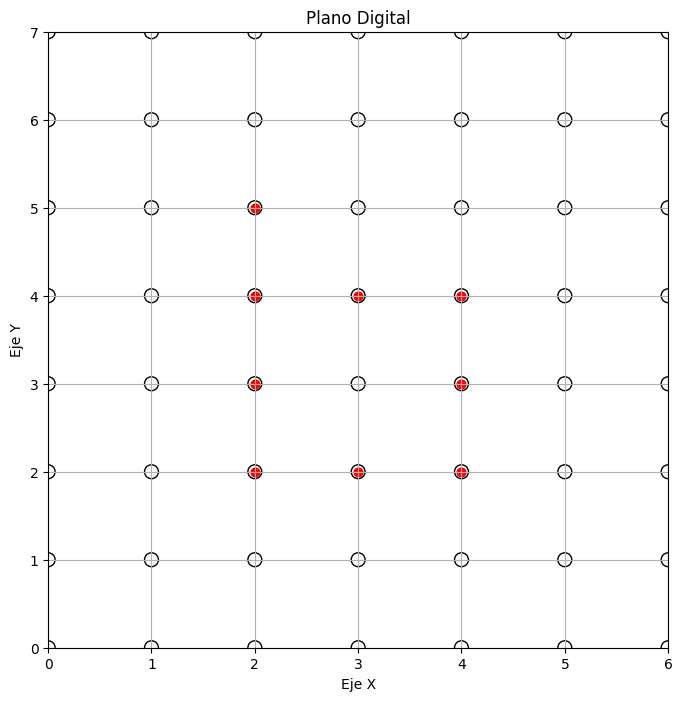

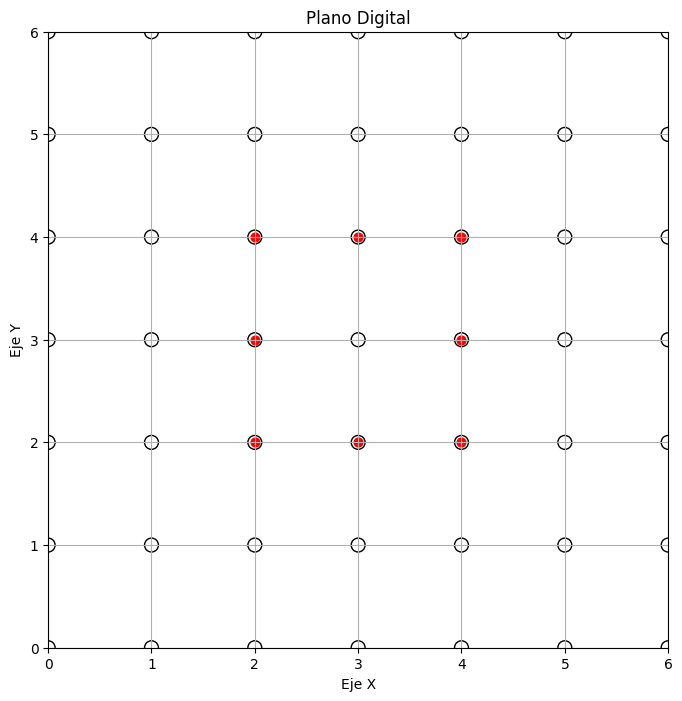

In [ ]:
def afinamientoConjunto_conexoSinAgujeros(conjuntoS,tipo ="4N"):

    if conjuntoSimpleConexo(conjuntoS, tipo):
        newSetAfinado = conjuntoS.copy()
        S_organizado = sorted(conjuntoS, key=lambda punto: (punto[1], punto[0]))
    
        for punto in S_organizado:
            if es_puntoSimple(newSetAfinado, punto, tipo):
                newSetAfinado.remove(punto)   

        return newSetAfinado
    return None

if __name__ == "__main__":
    #Ejemplo 3.14
    #Considere el siguiente conjunto conexo y con un agujero, perteneciente a una imagen
    #digital de 6 x 6 píxeles definido por:
    S = {(2,5), (2,4), (2,3), (2,2), (3,2), (4,2), (4,3), (4,4), (3,4)}
    graficarPlanoDigital(S)
    afinamientoS_4N = afinamientoConjunto_conexoSinAgujeros(S, "4N")
    #afinamientoS_8N = afinamientoConjunto_conexoSinAgujeros(S, "8N")

    graficarPlanoDigital(afinamientoS_4N)
        

## <center>*====Capítulo 4 : El algoritmo BF4 / BF8====*</center>

## **Definición 4.1: Borde de un subconjunto de una imagen digital.**
Dado un subconjunto $S$ de una imagen digital $\Pi$, el “borde de $S$”, que lo
simbolizaremos por Borde($S$), es el conjunto de puntos de $S$ que tienen vecinos 4N en
$S$ .


In [ ]:
from skimage.measure import label, regionprops

"""
def bordeConjunto(conjuntoS, complementoS):
    bordeS = set()
    for punto in conjuntoS:
        vecinosPunto = vecindad(punto)
        for vecino in vecinosPunto:
            if vecino in complementoS:
                bordeS.add(vecino)
                break
    
    return bordeS
"""

def umbralizar(matrizImagen, umbral):
    # Convertir la imagen a una matriz numpy
    matriz = matrizImagen

    # Aplicar umbralización a cada canal (si es una imagen en color)
    if len(matriz.shape) == 3:
        matriz = np.mean(matriz, axis=2)  # Convertir a escala de grises promedio

    # Aplicar umbralización a la matriz resultante
    matriz_umbralizada = np.where(matriz > umbral, 1, 0)

    return matriz_umbralizada


def segmentar(matriz_umbralizada):
    # Etiquetar regiones conectadas
    etiquetas = label(matriz_umbralizada)

    # Obtener propiedades de las regiones etiquetadas
    regiones = regionprops(etiquetas)

    # Crear subconjuntos basados en las regiones
    subconjuntos = {matriz_umbralizada * (etiquetas == region.label) for region in regiones}

    return subconjuntos


def segmentacion_BN2(matrizImagen):
    blanco = {(fila, columna) for fila, columna in zip(*np.where(matrizImagen == 255))}
    negro = {(fila, columna) for fila, columna in zip(*np.where(matrizImagen == 0))}
    return blanco, negro

# Función para crear una matriz y establecer valores en ubicaciones específicas a 0
def matriz_de_un_segmento(conjunto_de_puntos, dimension):
    filas, columnas = dimension
    matriz = np.array([[255] * columnas for _ in range(filas)],dtype="object")  # Inicializa una matriz con valores 255

    for punto in conjunto_de_puntos:
        fila, columna = punto
        matriz[fila][columna] = 0

    return matriz


if __name__ == "__main__":
    
    matrizImg = np.array([[255,255,255,255,255],
                          [255,255,  0,255,255],
                          [255,  0,  0,  0,255],
                          [255,255,  0,255,255],
                          [255,  0,  0,  0,255],
                          [255,255,  0,255,255],
                          [255,255,255,255,255]], dtype="object")

    print("Imagen en pixel")
    matriz_a_img_DF(matrizImg)
    dimension = matrizImg.shape
    segBlanc, segNegr = segmentacion_BN2(matrizImg)
    segNegrFront = frontera(segNegr)
    print("Frontera Imagen en pixel")
    matrizSegNegrFront = matriz_de_un_segmento(segNegrFront, dimension)
    matriz_a_img_DF(matrizSegNegrFront)


Imagen en pixel


/tmp/ipykernel_46822/495947515.py:71: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(estilo_color_html)


Frontera Imagen en pixel


## **Definición 4.2: Borde de una componente con respecto a una componente de su complemento.**
Sea $C$ una componente conexa de $S$ y $D$ una componente conexa de $\overline{S}$ . El borde de $C$
con respecto a $D$ es el conjunto definido por
$$C_{D} = \left \{ P \in C : P \text{ tiene al menos un vecino 4N en D} \right \}$$

In [ ]:
def bordeResp_CompleBN(componenteC_en_S, componenteD_en_compS):
    c_respect_d = set()

    for punto in componenteC_en_S:
        vecinosPunto = vecindad(punto)  # Asegúrate de tener la implementación de la función vecindad
        if any(vecino in componenteD_en_compS for vecino in vecinosPunto):
            c_respect_d.add(punto)
    
    return c_respect_d


if __name__ == "__main__":
    #Ejemplo 4.2
    #Sea S el conjunto de píxeles negros que figura en la siguiente imagen digital:

    matrizImg = np.array([[255, 255, 255, 255, 255],
                          [255, 255,   0, 255, 255],
                          [255,   0, 255,   0, 255],
                          [255, 255,   0, 255, 255],
                          [255,   0, 255,   0, 255],
                          [255, 255,   0, 255, 255],
                          [255, 255, 255, 255, 255]], dtype="object")

    print("Imagen")
    matriz_a_img_DF(matrizImg)

    complemtS, S = segmentacion_BN2(matrizImg)
    #En este caso, si consideramos conectividad 8N para S y conectividad 4N para su
    #complemento, tenemos:
    
    componentesS = componentes_conexas(S, "8N")
    componentesComplS = componentes_conexas(complemtS, "4N")
    print("Componentes 8N conexas de S", componentesS)
    print("Componentes 4N conexas de compleS", componentesComplS)

    #Imprimiendo el bordde con respecto a cada uno de sus componentes del complemento
    for componente in componentesComplS:
        print("================================")
        print("C = ", componentesS[0])
        print("D = ", componente)
        print("C_D = ", bordeResp_CompleBN(componentesS[0], componente))
        #graficarPlanoDigital(bordeResp_CompleBN(componentesS[0], componente))
    

    
    

Imagen


/tmp/ipykernel_46822/495947515.py:71: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(estilo_color_html)


Componentes 8N conexas de S [{(1, 2), (2, 1), (4, 3), (2, 3), (3, 2), (4, 1), (5, 2)}]
Componentes 4N conexas de compleS [{(4, 0), (3, 4), (3, 1), (5, 4), (5, 1), (0, 2), (1, 0), (1, 3), (6, 2), (3, 0), (3, 3), (5, 0), (5, 3), (0, 1), (2, 4), (0, 4), (6, 1), (6, 4), (4, 4), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4), (6, 0), (6, 3)}, {(2, 2)}, {(4, 2)}]
C =  {(1, 2), (2, 1), (4, 3), (2, 3), (3, 2), (4, 1), (5, 2)}
D =  {(4, 0), (3, 4), (3, 1), (5, 4), (5, 1), (0, 2), (1, 0), (1, 3), (6, 2), (3, 0), (3, 3), (5, 0), (5, 3), (0, 1), (2, 4), (0, 4), (6, 1), (6, 4), (4, 4), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4), (6, 0), (6, 3)}
C_D =  {(1, 2), (2, 1), (4, 3), (2, 3), (3, 2), (4, 1), (5, 2)}
C =  {(1, 2), (2, 1), (4, 3), (2, 3), (3, 2), (4, 1), (5, 2)}
D =  {(2, 2)}
C_D =  {(2, 3), (3, 2), (1, 2), (2, 1)}
C =  {(1, 2), (2, 1), (4, 3), (2, 3), (3, 2), (4, 1), (5, 2)}
D =  {(4, 2)}
C_D =  {(5, 2), (3, 2), (4, 1), (4, 3)}


## **El Algoritmo BF4**
Este algoritmo considera conectividad $4N$ para $C$ y conectividad $8N$ para $D$.
Supondremos que $C$ tiene más de un punto y que como dato inicial se nos da un par
ordenado de puntos $(P_{0}, Q_{0})$ donde $P_{0} \in C$, $Q_{0} \in  D$ y $P_{0}$ es vecino $4N$ de $Q_{0}$.
El algoritmo especifica cómo obtener un nuevo par $(P_{i+1}, Q_{i+1})$ a partir de $(P_{i}, Q_{i})$, con
$P_{i+1} \in C$ , $Q_{i+1} ∈ D$ y $P_{i+1}$ vecino $4N$ de $Q_{i+1}$. De este modo se visitarán todos los puntos
del borde $C_{D}$.

In [ ]:
import cv2
import numpy as np

# Carga la imagen
image = cv2.imread("muestraSangre.jpg")

# Verifica si la imagen se cargó correctamente
if image is None:
    print("Error: No se pudo cargar la imagen.")
else:
    # Encuentra los bordes
    edges = cv2.Sobel(image, cv2.CV_64F, 1, 1)  # Utilizar CV_64F para manejar valores negativos
    edges = np.abs(edges)  # Tomar el valor absoluto
    edges = np.uint8(edges * 255 / np.max(edges))  # Normalizar los valores a [0, 255]

    # Muestra la imagen
    plt.show(image)
    cv2.imshow("Bordes", edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


python3 aplicacion.py -i photoSebastian.jpeg -l en
# Referencias

https://www.datasmarts.net/como-aplicar-ocr-facilmente-con-easyocr/

https://imgbiblio.vaneduc.edu.ar/fulltext/files/TC099930.pdf
